<a href="https://colab.research.google.com/github/Ajayrajc1998/multivariate_LSTM/blob/main/Electricity_and_Weather_dataset_in_Romania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

acatalin14_romania_weather_visual_crossing_weather_path = kagglehub.dataset_download('acatalin14/romania-weather-visual-crossing-weather')
stefancomanita_hourly_electricity_consumption_and_production_path = kagglehub.dataset_download('stefancomanita/hourly-electricity-consumption-and-production')
ajayrac_cleaned_electricity_and_weather_data_path = kagglehub.dataset_download('ajayrac/cleaned-electricity-and-weather-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stefancomanita/hourly-electricity-consumption-and-production")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/hourly-electricity-consumption-and-production


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("acatalin14/romania-weather-visual-crossing-weather")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/romania-weather-visual-crossing-weather


In [ ]:
import pandas as pd
df1=pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
df2=pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')

In [ ]:
df1.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [ ]:
df2.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Alba Iulia, Romania",01/01/2011,-10.1,-3.6,-6.9,-8.2,90.62,NaN,8.9,21.6,...,4.8,71.6,1022.3,Mist,46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Partially cloudy
1,"Alba Iulia, Romania",01/02/2011,-9.0,-1.7,-4.6,-6.0,89.80,NaN,8.8,14.4,...,6.5,74.1,1017.9,"Mist, Light Snow, Fog",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Partially cloudy
2,"Alba Iulia, Romania",01/03/2011,-7.2,-1.8,-4.0,-5.0,93.01,NaN,8.7,7.2,...,4.3,94.5,1021.1,"Mist, Light Snow, Fog, Snow",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Overcast
3,"Alba Iulia, Romania",01/04/2011,-6.7,-4.5,-5.7,-7.4,87.73,NaN,7.0,14.4,...,7.4,96.6,1026.5,"Mist, Light Snow, Sky Coverage Increasing, Snow",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Overcast
4,"Alba Iulia, Romania",01/05/2011,-11.5,-5.0,-7.9,-10.2,83.54,NaN,8.0,15.1,...,8.1,61.1,1027.9,Mist,46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Partially cloudy


In [ ]:
df2.columns

Index(['Address', 'Date time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Wind Direction', 'Wind Chill',
       'Precipitation', 'Precipitation Cover', 'Snow Depth', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Weather Type', 'Latitude',
       'Longitude', 'Resolved Address', 'Name', 'Info', 'Conditions'],
      dtype='object')

In [ ]:
for i in df2.columns:
    if df2[i].dtype=='float64':
        print(f'range of the feature {i}')
        print('(range: ',df2[i].min(),'-',df2[i].max(),')')

range of the feature Minimum Temperature
(range:  -29.1 - 27.3 )
range of the feature Maximum Temperature
(range:  -21.5 - 42.1 )
range of the feature Temperature
(range:  -23.7 - 32.4 )
range of the feature Dew Point
(range:  -42.8 - 23.7 )
range of the feature Relative Humidity
(range:  3.05 - 100.0 )
range of the feature Heat Index
(range:  25.8 - 88.0 )
range of the feature Wind Speed
(range:  0.0 - 187.1 )
range of the feature Wind Gust
(range:  0.0 - 230.4 )
range of the feature Wind Direction
(range:  7.71 - 360.0 )
range of the feature Wind Chill
(range:  -44.7 - 9.8 )
range of the feature Precipitation
(range:  0.0 - 308.0 )
range of the feature Precipitation Cover
(range:  0.0 - 100.0 )
range of the feature Snow Depth
(range:  0.0 - 998.0 )
range of the feature Visibility
(range:  0.0 - 222.9 )
range of the feature Cloud Cover
(range:  0.0 - 100.0 )
range of the feature Sea Level Pressure
(range:  939.4 - 1060.6 )
range of the feature Latitude
(range:  43.9147 - 47.7933 )
ran

In [ ]:
df2['Conditions'].unique()

array(['Partially cloudy', 'Overcast', 'Clear', 'Rain, Overcast',
       'Rain, Partially cloudy', 'Rain', nan], dtype=object)

In [ ]:
df2['Name'].unique()

array(['Alba Iulia, România', 'Arad, România', 'Pite<U+0219>ti, România',
       'Bacau, România', 'Oradea, România', 'Bistri<U+021B>a, România',
       'Boto<U+0219>ani, România', 'Braila, România',
       'Bra<U+0219>ov, România', 'Bucure<U+0219>ti, România',
       'Buzau, România', 'Calara<U+0219>i, România',
       'Re<U+0219>i<U+021B>a, România', 'Cluj-Napoca, România',
       'Constan<U+021B>a, România', 'Sfântu Gheorghe, România',
       'Târgovi<U+0219>te, România', 'Craiova, România',
       'Gala<U+021B>i, România', 'Giurgiu, România', 'Târgu Jiu, România',
       'Miercurea Ciuc, România', 'Deva, România', 'Slobozia, România',
       'Ia<U+0219>i, România', 'Baia Mare, România',
       'Drobeta-Turnu Severin, România', 'Târgu Mure<U+0219>, România',
       'Piatra Neam<U+021B>, România', 'Slatina, România',
       'Ploie<U+0219>ti, România', 'Zalau, România', 'Satu Mare, România',
       'Sibiu, România', 'Suceava, România', 'Alexandria, România',
       'Timi<U+0219>oara, 

In [ ]:
def date_set_index(df,date_col):
    df[date_col]=pd.to_datetime(df[date_col])
    df.index=df[date_col]
    df.drop(date_col,axis=1,inplace=True)
    return df

In [ ]:
df1=date_set_index(df1,'DateTime')
df1_resampled = df1.resample('D').mean()  # or other aggregation method
# df2_resampled = df2.resample('D').mean()

In [ ]:
df2=date_set_index(df2,'Date time')

In [ ]:
from scipy import stats
def merge_data(df1,df2):
    merged_df=pd.merge(df1,df2,left_index=True,right_index=True)
    merged_df.fillna(method='ffill',inplace=True)
    return merged_df

In [ ]:
merged_df=merge_data(df1_resampled,df2)
merged_df.head()

/tmp/ipykernel_30/2194172848.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill',inplace=True)


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Address,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-01,5957.666667,5924.416667,1391.75,343.583333,1285.875,1418.0,1408.708333,43.291667,32.791667,"Alba Iulia, Romania",...,8.3,64.4,1026.5,"Mist, Fog",46.0709,23.5805,"Alba Iulia, România","Alba Iulia, România",NaN,Partially cloudy
2019-01-01,5957.666667,5924.416667,1391.75,343.583333,1285.875,1418.0,1408.708333,43.291667,32.791667,"Arad, Romania",...,4.9,49.7,1027.2,"Mist, Heavy Rain And Snow, Light Rain And Snow...",46.1807,21.3221,"Arad, România","Arad, România",NaN,"Rain, Partially cloudy"
2019-01-01,5957.666667,5924.416667,1391.75,343.583333,1285.875,1418.0,1408.708333,43.291667,32.791667,"Pitesti, Romania",...,3.3,39.6,1025.8,"Mist, Fog",44.8515,24.8799,"Pite<U+0219>ti, România","Pite<U+0219>ti, România",NaN,Partially cloudy
2019-01-01,5957.666667,5924.416667,1391.75,343.583333,1285.875,1418.0,1408.708333,43.291667,32.791667,"Bacau, Romania",...,6.4,39.6,1024.1,"Mist, Fog",46.5691,26.9110,"Bacau, România","Bacau, România",NaN,"Rain, Partially cloudy"
2019-01-01,5957.666667,5924.416667,1391.75,343.583333,1285.875,1418.0,1408.708333,43.291667,32.791667,"Oradea, Romania",...,7.5,63.7,1026.4,"Mist, Light Snow, Heavy Rain And Snow, Fog, Li...",47.0518,21.9387,"Oradea, România","Oradea, România",NaN,"Rain, Partially cloudy"


### Tesing the code given for cleaning the data for LSTM prediction of the target column 'Consumption' in electricity data

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load datasets
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')

# Convert datetime columns to pandas datetime format
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_data['DateTime'] = pd.to_datetime(weather_data['Date time'], format='%m/%d/%Y')

# Set DateTime as the index for both datasets
electricity_data.set_index('DateTime', inplace=True)
weather_data.set_index('DateTime', inplace=True)

# Drop unnecessary columns from the weather dataset
weather_data.drop(['Address', 'Name', 'Info', 'Resolved Address', 'Latitude', 'Longitude'], axis=1, inplace=True)

# Check for duplicate index and drop them if necessary
weather_data = weather_data[~weather_data.index.duplicated(keep='first')]

# Resample the data with forward fill
weather_data = weather_data.resample('H').ffill()

# Merge datasets on DateTime
merged_data = pd.merge(electricity_data, weather_data, left_index=True, right_index=True, how='inner')

# 1. Handle missing values
# For numerical columns, interpolate using spline interpolation
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[numerical_columns] = merged_data[numerical_columns].interpolate(method='spline', order=3)

# Handle any remaining NaNs with forward fill and backward fill
merged_data[numerical_columns] = merged_data[numerical_columns].fillna(method='ffill').fillna(method='bfill')

# For categorical columns, replace NaN with 'Unknown'
categorical_columns = ['Weather Type', 'Conditions']
if any(col in merged_data.columns for col in categorical_columns):  # Check if categorical columns exist
    merged_data[categorical_columns] = merged_data[categorical_columns].fillna('Unknown')

    # Apply LabelEncoder for encoding categorical columns
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        merged_data[col] = label_encoder.fit_transform(merged_data[col])

# 2. Handle outliers (example for some key columns)
merged_data['Temperature'] = merged_data['Temperature'].clip(lower=-30, upper=45)
merged_data['Relative Humidity'] = merged_data['Relative Humidity'].clip(lower=0, upper=100)
merged_data['Wind Speed'] = merged_data['Wind Speed'].clip(upper=200)

# 3. Create lag features for the target variable (Consumption)
# Adding 24-hour lag for Consumption
merged_data['Consumption_Lag_24'] = merged_data['Consumption'].shift(24)

# Drop rows with NaN introduced by lagging
merged_data.dropna(inplace=True)

# 4. Scale numerical columns (exclude the target column 'Consumption')
scaler = MinMaxScaler()
scaled_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
scaled_columns = scaled_columns[scaled_columns != 'Consumption']  # Exclude target variable from scaling
merged_data[scaled_columns] = scaler.fit_transform(merged_data[scaled_columns])

# Final cleaned and prepared dataset
print(merged_data.head())

# Split data into features (X) and target (y)
X = merged_data.drop('Consumption', axis=1)
y = merged_data['Consumption']

# Reshape data for LSTM
import numpy as np
X = np.array(X)
y = np.array(y)

# Reshape X for LSTM: [samples, time steps, features]
# Since the model is likely dealing with time-series data, you may want more than 1 time step.
# For instance, using the last 24 hours to predict the current hour.
time_steps = 24  # Define how many time steps you want to use for LSTM
X_lstm = []

for i in range(time_steps, len(X)):
    X_lstm.append(X[i-time_steps:i])  # Add previous 'time_steps' hours as features

X_lstm = np.array(X_lstm)

print(f"Final shape of X: {X_lstm.shape}")
print(f"Final shape of y: {y.shape}")


/tmp/ipykernel_30/3523226153.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data = weather_data.resample('H').ffill()
/tmp/ipykernel_30/3523226153.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data[numerical_columns] = merged_data[numerical_columns].fillna(method='ffill').fillna(method='bfill')


                     Consumption  Production   Nuclear      Wind  \
DateTime                                                           
2019-01-02 00:00:00         5647    0.468386  0.945388  0.520973   
2019-01-02 01:00:00         5500    0.410035  0.945388  0.597110   
2019-01-02 02:00:00         5385    0.405788  0.946602  0.577723   
2019-01-02 03:00:00         5327    0.414124  0.944175  0.651745   
2019-01-02 04:00:00         5362    0.383454  0.944175  0.622136   

                     Hydroelectric  Oil and Gas      Coal  Solar   Biomass  \
DateTime                                                                     
2019-01-02 00:00:00       0.184990     0.562241  0.445084    0.0  0.246377   
2019-01-02 01:00:00       0.116396     0.427386  0.426926    0.0  0.246377   
2019-01-02 02:00:00       0.119742     0.426867  0.433127    0.0  0.246377   
2019-01-02 03:00:00       0.085803     0.425830  0.428255    0.0  0.246377   
2019-01-02 04:00:00       0.058078     0.419087  0.4362

In [ ]:
merged_data.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date time,...,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Conditions,Consumption_Lag_24
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,5647,0.468386,0.945388,0.520973,0.184990,0.562241,0.445084,0.0,0.246377,01/02/2019,...,0.35775,0.0,0.181848,0.500443,0.691729,0.716467,0.406654,0.678161,0.4,0.410372
2019-01-02 01:00:00,5500,0.410035,0.945388,0.597110,0.116396,0.427386,0.426926,0.0,0.246377,01/02/2019,...,0.35775,0.0,0.181848,0.500443,0.691729,0.716467,0.406654,0.678161,0.4,0.367727
2019-01-02 02:00:00,5385,0.405788,0.946602,0.577723,0.119742,0.426867,0.433127,0.0,0.246377,01/02/2019,...,0.35775,0.0,0.181848,0.500443,0.691729,0.716467,0.406654,0.678161,0.4,0.323816
2019-01-02 03:00:00,5327,0.414124,0.944175,0.651745,0.085803,0.425830,0.428255,0.0,0.246377,01/02/2019,...,0.35775,0.0,0.181848,0.500443,0.691729,0.716467,0.406654,0.678161,0.4,0.289302
2019-01-02 04:00:00,5362,0.383454,0.944175,0.622136,0.058078,0.419087,0.436227,0.0,0.246377,01/02/2019,...,0.35775,0.0,0.181848,0.500443,0.691729,0.716467,0.406654,0.678161,0.4,0.266715


In [ ]:
duplicates = weather_data.index.duplicated()
print("Number of duplicate timestamps:", duplicates.sum())


Number of duplicate timestamps: 160720


In [ ]:
duplicate_rows = weather_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 9


KeyError: Index(['DateTime'], dtype='object')

In [ ]:
weather_data.head()

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Conditions
DateTime,,,,,,,,,,,,,,,,,,,
2011-01-01,01/01/2011,-10.1,-3.6,-6.9,-8.2,90.62,NaN,8.9,21.6,247.43,-8.2,0.0,0.0,3.32,4.8,71.6,1022.3,Mist,Partially cloudy
2011-01-02,01/02/2011,-9.0,-1.7,-4.6,-6.0,89.80,NaN,8.8,14.4,229.96,-11.8,0.0,0.0,2.76,6.5,74.1,1017.9,"Mist, Light Snow, Fog",Partially cloudy
2011-01-03,01/03/2011,-7.2,-1.8,-4.0,-5.0,93.01,NaN,8.7,7.2,241.96,-9.4,0.0,0.0,3.12,4.3,94.5,1021.1,"Mist, Light Snow, Fog, Snow",Overcast
2011-01-04,01/04/2011,-6.7,-4.5,-5.7,-7.4,87.73,NaN,7.0,14.4,221.46,-9.6,0.0,0.0,3.12,7.4,96.6,1026.5,"Mist, Light Snow, Sky Coverage Increasing, Snow",Overcast
2011-01-05,01/05/2011,-11.5,-5.0,-7.9,-10.2,83.54,NaN,8.0,15.1,116.25,-15.1,0.0,0.0,3.12,8.1,61.1,1027.9,Mist,Partially cloudy


In [ ]:
### Merging the electicity dataset

### converting the hourly electricity dataset to daily and merging with weather data

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load datasets
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')

# Convert datetime columns to pandas datetime format
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_data['DateTime'] = pd.to_datetime(weather_data['Date time'], format='%m/%d/%Y')

# Set DateTime as the index for both datasets
electricity_data.set_index('DateTime', inplace=True)
weather_data.set_index('DateTime', inplace=True)

# Drop unnecessary columns from the weather dataset
weather_data.drop(['Address', 'Name', 'Info', 'Resolved Address', 'Latitude', 'Longitude'], axis=1, inplace=True)

# Resample electricity data to daily frequency (using sum for production and consumption)
electricity_data_daily = electricity_data.resample('D').agg({
    'Consumption': 'sum',         # Sum of consumption per day
    'Production': 'sum',          # Sum of total production per day
    'Nuclear': 'sum',             # Sum of nuclear production per day
    'Wind': 'sum',                # Sum of wind production per day
    'Hydroelectric': 'sum',       # Sum of hydroelectric production per day
    'Oil and Gas': 'sum',         # Sum of oil and gas production per day
    'Coal': 'sum',                # Sum of coal production per day
    'Solar': 'sum',               # Sum of solar production per day
    'Biomass': 'sum'              # Sum of biomass production per day
})

# Merge the daily electricity data with the weather data (weather data is already daily)
merged_data = pd.merge(electricity_data_daily, weather_data, left_index=True, right_index=True, how='inner')

# 1. Handle missing values using spline interpolation
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Applying spline interpolation on the numerical columns (order=3 for cubic spline)
merged_data[numerical_columns] = merged_data[numerical_columns].interpolate(method='spline', order=3)

# Handle any remaining NaNs with forward fill and backward fill if spline doesn't cover all
merged_data[numerical_columns] = merged_data[numerical_columns].fillna(method='ffill').fillna(method='bfill')

# For categorical columns, replace NaN with 'Unknown'
categorical_columns = ['Weather Type', 'Conditions']
merged_data[categorical_columns] = merged_data[categorical_columns].fillna('Unknown')

# 2. Handle outliers (example for some key columns)
merged_data['Temperature'] = merged_data['Temperature'].clip(lower=-30, upper=45)
merged_data['Relative Humidity'] = merged_data['Relative Humidity'].clip(lower=0, upper=100)
merged_data['Wind Speed'] = merged_data['Wind Speed'].clip(upper=200)

# 3. Create lag features for the target variable (Consumption)
# Adding 24-hour lag for Consumption
merged_data['Consumption_Lag_24'] = merged_data['Consumption'].shift(24)

# Drop rows with NaN introduced by lagging
merged_data.dropna(inplace=True)

# Encode categorical columns with one-hot encoding
merged_data = pd.get_dummies(merged_data, columns=['Weather Type', 'Conditions'], drop_first=True)

# 4. Scale numerical columns
scaler = MinMaxScaler()
scaled_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[scaled_columns] = scaler.fit_transform(merged_data[scaled_columns])

# Final cleaned and prepared dataset
print(merged_data.head())

# Split data into features (X) and target (y)
X = merged_data.drop('Consumption', axis=1)
y = merged_data['Consumption']

# Reshape data for LSTM
import numpy as np
X = np.array(X)
y = np.array(y)

# Reshape X for LSTM: [samples, time steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

print(f"Final shape of X: {X.shape}")
print(f"Final shape of y: {y.shape}")


/tmp/ipykernel_30/3014716691.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data[numerical_columns] = merged_data[numerical_columns].fillna(method='ffill').fillna(method='bfill')


            Consumption  Production   Nuclear      Wind  Hydroelectric  \
DateTime                                                                 
2019-01-01     0.338431    0.391314  0.833035  0.128612       0.200952   
2019-01-01     0.338431    0.391314  0.833035  0.128612       0.200952   
2019-01-01     0.338431    0.391314  0.833035  0.128612       0.200952   
2019-01-01     0.338431    0.391314  0.833035  0.128612       0.200952   
2019-01-01     0.338431    0.391314  0.833035  0.128612       0.200952   

            Oil and Gas      Coal     Solar   Biomass   Date time  ...  \
DateTime                                                           ...   
2019-01-01     0.649517  0.543092  0.091929  0.177276  01/01/2019  ...   
2019-01-01     0.649517  0.543092  0.091929  0.177276  01/01/2019  ...   
2019-01-01     0.649517  0.543092  0.091929  0.177276  01/01/2019  ...   
2019-01-01     0.649517  0.543092  0.091929  0.177276  01/01/2019  ...   
2019-01-01     0.649517  0.543092  0.

#### Now converting the daily weather data into hourly data using interpolation method.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load datasets
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')

# Convert datetime columns to pandas datetime format
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_data['DateTime'] = pd.to_datetime(weather_data['Date time'], format='%m/%d/%Y')

# Set DateTime as the index for both datasets
electricity_data.set_index('DateTime', inplace=True)
weather_data.set_index('DateTime', inplace=True)

# Drop unnecessary columns from the weather dataset
weather_data.drop(['Address', 'Name', 'Info', 'Resolved Address', 'Latitude', 'Longitude'], axis=1, inplace=True)

# Resample electricity data to daily frequency (using sum for production and consumption)
electricity_data_daily = electricity_data.resample('D').agg({
    'Consumption': 'sum',         # Sum of consumption per day
    'Production': 'sum',          # Sum of total production per day
    'Nuclear': 'sum',             # Sum of nuclear production per day
    'Wind': 'sum',                # Sum of wind production per day
    'Hydroelectric': 'sum',       # Sum of hydroelectric production per day
    'Oil and Gas': 'sum',         # Sum of oil and gas production per day
    'Coal': 'sum',                # Sum of coal production per day
    'Solar': 'sum',               # Sum of solar production per day
    'Biomass': 'sum'              # Sum of biomass production per day
})

# Resample the weather data to hourly frequency using forward fill
# Resampling to hourly data by forward filling the missing data
weather_data_resampled = weather_data.resample('H').ffill()

# Apply spline interpolation to the resampled weather data for filling missing values
numerical_columns_weather = weather_data_resampled.select_dtypes(include=['float64', 'int64']).columns

# Apply spline interpolation on weather data's numerical columns (order=3 for cubic spline)
weather_data_resampled[numerical_columns_weather] = weather_data_resampled[numerical_columns_weather].interpolate(method='spline', order=3)

# Handle any remaining NaNs with forward fill and backward fill if spline doesn't cover all
weather_data_resampled[numerical_columns_weather] = weather_data_resampled[numerical_columns_weather].fillna(method='ffill').fillna(method='bfill')

# Now merge the daily electricity data with the resampled weather data (they are now aligned)
merged_data = pd.merge(electricity_data_daily, weather_data_resampled, left_index=True, right_index=True, how='inner')

# Handle missing values for merged dataset using spline interpolation
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[numerical_columns] = merged_data[numerical_columns].interpolate(method='spline', order=3)

# Handle any remaining NaNs with forward fill and backward fill if spline doesn't cover all
merged_data[numerical_columns] = merged_data[numerical_columns].fillna(method='ffill').fillna(method='bfill')

# For categorical columns, replace NaN with 'Unknown'
categorical_columns = ['Weather Type', 'Conditions']
merged_data[categorical_columns] = merged_data[categorical_columns].fillna('Unknown')

# Handle outliers (example for some key columns)
merged_data['Temperature'] = merged_data['Temperature'].clip(lower=-30, upper=45)
merged_data['Relative Humidity'] = merged_data['Relative Humidity'].clip(lower=0, upper=100)
merged_data['Wind Speed'] = merged_data['Wind Speed'].clip(upper=200)

# Create lag features for the target variable (Consumption)
# Adding 24-hour lag for Consumption
merged_data['Consumption_Lag_24'] = merged_data['Consumption'].shift(24)

# Drop rows with NaN introduced by lagging
merged_data.dropna(inplace=True)

# Encode categorical columns with one-hot encoding
merged_data = pd.get_dummies(merged_data, columns=['Weather Type', 'Conditions'], drop_first=True)

# Scale numerical columns
scaler = MinMaxScaler()
scaled_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[scaled_columns] = scaler.fit_transform(merged_data[scaled_columns])

# Final cleaned and prepared dataset
print(merged_data.head())

# Split data into features (X) and target (y)
X = merged_data.drop('Consumption', axis=1)
y = merged_data['Consumption']

# Reshape data for LSTM
import numpy as np
X = np.array(X)
y = np.array(y)

# Reshape X for LSTM: [samples, time steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

print(f"Final shape of X: {X.shape}")
print(f"Final shape of y: {y.shape}")


## cleaning the electricity and weather data and saving the cleaned file

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load datasets
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')

# Convert datetime columns to pandas datetime format
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_data['DateTime'] = pd.to_datetime(weather_data['Date time'], format='%m/%d/%Y')

# Set DateTime as the index for both datasets
electricity_data.set_index('DateTime', inplace=True)
weather_data.set_index('DateTime', inplace=True)

# 1. Clean Electricity Data (Aggregate Hourly to Daily)
# Aggregate electricity data to daily by summing relevant numerical columns
electricity_data_daily = electricity_data.resample('D').sum()

# Handle missing values in electricity data
electricity_data_daily.interpolate(method='spline', order=3, inplace=True)
electricity_data_daily.fillna(method='ffill', inplace=True)
electricity_data_daily.fillna(method='bfill', inplace=True)

# Save cleaned electricity data to CSV
electricity_data_daily.to_csv('cleaned_electricity_data_daily.csv')

# 2. Clean Weather Data
# Drop unnecessary columns
weather_data.drop(['Address', 'Name', 'Info', 'Resolved Address', 'Latitude', 'Longitude'], axis=1, inplace=True)

# Check for duplicate indices and drop them
weather_data = weather_data[~weather_data.index.duplicated(keep='first')]

# Handle missing values for numerical columns in weather data
numerical_columns_weather = weather_data.select_dtypes(include=['float64', 'int64']).columns
weather_data[numerical_columns_weather] = weather_data[numerical_columns_weather].interpolate(method='spline', order=3)
weather_data[numerical_columns_weather] = weather_data[numerical_columns_weather].fillna(method='ffill').fillna(method='bfill')

# For categorical columns, replace NaN with 'Unknown' and encode
categorical_columns = ['Weather Type', 'Conditions']
if any(col in weather_data.columns for col in categorical_columns):
    weather_data[categorical_columns] = weather_data[categorical_columns].fillna('Unknown')

    label_encoder = LabelEncoder()
    for col in categorical_columns:
        weather_data[col] = label_encoder.fit_transform(weather_data[col])

# Save cleaned weather data to CSV
weather_data.to_csv('cleaned_weather_data_daily.csv')

# Merge the datasets on the daily index
merged_data = pd.merge(electricity_data_daily, weather_data, left_index=True, right_index=True, how='inner')

# Save merged dataset
merged_data.to_csv('merged_cleaned_data.csv')

# Final Outputs
print("Cleaned electricity data (daily) saved as 'cleaned_electricity_data_daily.csv'")
print("Cleaned weather data (daily) saved as 'cleaned_weather_data_daily.csv'")
print("Merged dataset saved as 'merged_cleaned_data.csv'")


/tmp/ipykernel_30/4280262018.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_data_daily.fillna(method='ffill', inplace=True)
/tmp/ipykernel_30/4280262018.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_data_daily.fillna(method='bfill', inplace=True)


Cleaned electricity data (daily) saved as 'cleaned_electricity_data_daily.csv'
Cleaned weather data (daily) saved as 'cleaned_weather_data_daily.csv'
Merged dataset saved as 'merged_cleaned_data.csv'


/tmp/ipykernel_30/4280262018.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data[numerical_columns_weather] = weather_data[numerical_columns_weather].fillna(method='ffill').fillna(method='bfill')


In [ ]:
## Weather data is for 41 regions/state in romania, so for a date

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load datasets
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')

# Convert datetime columns to pandas datetime format
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'], format='%Y-%m-%d %H:%M:%S')
weather_data['DateTime'] = pd.to_datetime(weather_data['Date time'], format='%m/%d/%Y')

# Set DateTime as the index for both datasets
electricity_data.set_index('DateTime', inplace=True)
weather_data.set_index('DateTime', inplace=True)

# 1. Clean Electricity Data (Aggregate Hourly to Daily)
electricity_data_daily = electricity_data.resample('D').sum()

# Handle missing values in electricity data
electricity_data_daily.interpolate(method='spline', order=3, inplace=True)
electricity_data_daily.fillna(method='ffill', inplace=True)
electricity_data_daily.fillna(method='bfill', inplace=True)

# Replace any remaining nulls with the median (fallback)
electricity_data_daily.fillna(electricity_data_daily.median(), inplace=True)

# Save cleaned electricity data to CSV
electricity_data_daily.to_csv('cleaned_electricity_data_daily.csv')

# 2. Clean and Aggregate Weather Data
weather_data.drop(['Address', 'Name', 'Info', 'Resolved Address', 'Latitude', 'Longitude'], axis=1, inplace=True)

# Define aggregation rules for weather columns
aggregation_rules = {
    'Minimum Temperature': 'min',
    'Maximum Temperature': 'max',
    'Temperature': 'mean',
    'Dew Point': 'mean',
    'Relative Humidity': 'mean',
    'Heat Index': 'mean',
    'Wind Speed': 'max',
    'Wind Gust': 'max',
    'Cloud Cover': 'mean',
    'Weather Type': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown',
    'Conditions': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
}

# Group weather data by date and aggregate
weather_data_daily = weather_data.groupby(weather_data.index.date).agg(aggregation_rules)

# Convert the index back to datetime for merging
weather_data_daily.index = pd.to_datetime(weather_data_daily.index)

# Handle missing values for numerical columns
numerical_columns_weather = weather_data_daily.select_dtypes(include=['float64', 'int64']).columns
weather_data_daily[numerical_columns_weather] = weather_data_daily[numerical_columns_weather].interpolate(method='spline', order=3)
weather_data_daily[numerical_columns_weather] = weather_data_daily[numerical_columns_weather].fillna(method='ffill').fillna(method='bfill')

# Replace any remaining nulls in numerical columns with column means (fallback)
weather_data_daily[numerical_columns_weather] = weather_data_daily[numerical_columns_weather].fillna(weather_data_daily[numerical_columns_weather].mean())

# Handle missing values for categorical columns
categorical_columns = ['Weather Type', 'Conditions']
if any(col in weather_data_daily.columns for col in categorical_columns):
    weather_data_daily[categorical_columns] = weather_data_daily[categorical_columns].fillna('Unknown')

    # Encode categorical columns
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        weather_data_daily[col] = label_encoder.fit_transform(weather_data_daily[col])

# Save cleaned weather data to CSV
weather_data_daily.to_csv('cleaned_weather_data_daily.csv')

# 3. Merge the datasets on the daily index
merged_data = pd.merge(electricity_data_daily, weather_data_daily, left_index=True, right_index=True, how='inner')

# Final check for nulls in merged data
# Replace any residual nulls in numerical columns with column means
numerical_columns_merged = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[numerical_columns_merged] = merged_data[numerical_columns_merged].fillna(merged_data[numerical_columns_merged].mean())

# Replace any residual nulls in categorical columns with the most frequent value
for col in categorical_columns:
    if col in merged_data.columns:
        merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)

# Save merged dataset
merged_data.to_csv('merged_cleaned_data.csv')

# Final Outputs
print("Cleaned electricity data (daily) saved as 'cleaned_electricity_data_daily.csv'")
print("Cleaned weather data (daily) saved as 'cleaned_weather_data_daily.csv'")
print("Merged dataset saved as 'merged_cleaned_data.csv'")


/tmp/ipykernel_30/3688686059.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_data_daily.fillna(method='ffill', inplace=True)
/tmp/ipykernel_30/3688686059.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_data_daily.fillna(method='bfill', inplace=True)


Cleaned electricity data (daily) saved as 'cleaned_electricity_data_daily.csv'
Cleaned weather data (daily) saved as 'cleaned_weather_data_daily.csv'
Merged dataset saved as 'merged_cleaned_data.csv'


/tmp/ipykernel_30/3688686059.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data_daily[numerical_columns_weather] = weather_data_daily[numerical_columns_weather].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_30/3688686059.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)
/tmp/ipykernel_30/3688686059.py:86: FutureWarning: A value is trying t

In [ ]:
merged_data.index.min()

Timestamp('2019-01-01 00:00:00')

In [ ]:
weather_data_daily.head()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Cloud Cover,Weather Type,Conditions
2011-01-01,-16.1,5.4,-6.107317,-7.778049,88.743902,26.2,66.3,43.2,49.890244,212,2
2011-01-02,-13.8,9.4,-4.263415,-6.324390,86.554390,26.2,75.2,46.8,46.885366,209,0
2011-01-03,-18.9,2.2,-3.529268,-4.597561,92.637073,26.2,28.8,50.4,85.809756,254,4
2011-01-04,-19.9,1.2,-6.578049,-8.239024,88.516585,26.2,50.4,43.2,61.648780,269,1
2011-01-05,-19.1,2.1,-8.326829,-10.360976,86.447073,26.2,28.8,55.4,61.280488,209,2


In [ ]:
weather_data_daily.isnull().sum()

Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Dew Point              0
Relative Humidity      0
Heat Index             0
Wind Speed             0
Wind Gust              0
Cloud Cover            0
Weather Type           0
Conditions             0
dtype: int64

In [ ]:
electricity_data.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [ ]:
electricity_data.isnull().sum()

Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

### Working on LSTM model without Manipulating the dataset

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# Step 1: Load the CSV files with Hourly and Daily data
hourly_df = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
daily_df = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')
# Convert datetime columns to pandas datetime format
hourly_df['DateTime'] = pd.to_datetime(hourly_df['DateTime'], format='%Y-%m-%d %H:%M:%S')
daily_df['DateTime'] = pd.to_datetime(daily_df['Date time'], format='%m/%d/%Y')

# Set DateTime as the index for both datasets
hourly_df.set_index('DateTime', inplace=True)
daily_df.set_index('DateTime', inplace=True)
hourly_df.drop('DateTime',axis=1, inplace=True)
daily_df.drop('DateTime',axis=1, inplace=True)




# Step 2: Feature Engineering for Time Features
def add_time_features(df, freq):
    """
    Add time-based features to the dataframe depending on its frequency.
    """
    if freq == 'hour':
        df['hour'] = df.index.hour
        df['day_of_week'] = df.index.dayofweek
    elif freq == 'daily':
        df['day_of_week'] = df.index.dayofweek
        df['month'] = df.index.month
    return df

# Add time features based on frequency
hourly_df = add_time_features(hourly_df, 'hour')
daily_df = add_time_features(daily_df, 'daily')

# Step 3: Normalize the data using StandardScaler
scaler = StandardScaler()

# Normalize the hourly data (dropping non-numeric columns like datetime)
hourly_scaled = scaler.fit_transform(hourly_df.drop(columns=['Consumption']))  # Normalize without target

# Normalize the daily data (drop datetime and other non-numeric columns)
daily_scaled = scaler.fit_transform(daily_df.drop(columns=['Consumption']))  # No 'Consumption' column in daily data

# Step 4: Create Sequences for LSTM Model
def create_sequences(data, target_col, seq_length=24):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = target_col[i+seq_length]  # Target column is 'Consumption'
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences for the hourly data (target column is 'Consumption')
hourly_X, hourly_y = create_sequences(hourly_scaled, hourly_df['Consumption'].values, seq_length=24)

# Create sequences for the daily data (weather features as input)
# Since daily data is not time-aligned with hourly data, we repeat the daily weather data for each hour in the same day
daily_weather_features = np.repeat(daily_scaled, 24, axis=0)  # Repeat the weather features for each hour

# Create sequences for the daily data (weather features as input)
daily_X, _ = create_sequences(daily_weather_features, hourly_df['Consumption'].values, seq_length=24)

# Step 5: Build the LSTM Model with Separate Inputs for Hourly and Daily Data
class LSTMModel(tf.keras.Model):
    def __init__(self, input_size_hourly, input_size_daily, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()

        # Separate LSTM layers for each dataset
        self.lstm_hourly = tf.keras.layers.LSTM(hidden_layer_size, return_sequences=False)
        self.lstm_daily = tf.keras.layers.LSTM(hidden_layer_size, return_sequences=False)

        # Fully connected layer to combine the outputs
        self.fc = tf.keras.layers.Dense(output_size)

    def call(self, hourly_input, daily_input):
        # Process inputs through their respective LSTMs
        lstm_hourly_out = self.lstm_hourly(hourly_input)
        lstm_daily_out = self.lstm_daily(daily_input)

        # Concatenate the outputs from both LSTMs
        combined_out = tf.concat([lstm_hourly_out, lstm_daily_out], axis=1)

        # Final prediction
        out = self.fc(combined_out)
        return out

# Hyperparameters
input_size_hourly = hourly_X.shape[2]
input_size_daily = daily_X.shape[2]
hidden_layer_size = 64
output_size = 1  # For predicting a single value (e.g., consumption)
lr = 0.001
epochs = 50
batch_size = 64

# Initialize the model
model = LSTMModel(input_size_hourly, input_size_daily, hidden_layer_size, output_size)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')

# Step 6: Train the model
# You should split data into train/test or use a validation split
# Prepare the inputs for training (convert data to TensorFlow tensors)
hourly_X_tensor = tf.convert_to_tensor(hourly_X, dtype=tf.float32)
daily_X_tensor = tf.convert_to_tensor(daily_X, dtype=tf.float32)

hourly_y_tensor = tf.convert_to_tensor(hourly_y, dtype=tf.float32)

# Split into training and validation sets (80% for training, 20% for validation)
train_size = int(0.8 * len(hourly_X_tensor))

# Training
model.fit(
    [hourly_X_tensor[:train_size], daily_X_tensor[:train_size]],
    hourly_y_tensor[:train_size],  # Using the 'Consumption' column for prediction
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(
        [hourly_X_tensor[train_size:], daily_X_tensor[train_size:]],
        hourly_y_tensor[train_size:]
    )
)

# Step 7: Model Evaluation
loss = model.evaluate(
    [hourly_X_tensor[train_size:], daily_X_tensor[train_size:]],
    hourly_y_tensor[train_size:]
)

print(f"Test Loss: {loss}")


KeyError: "['DateTime'] not found in axis"

In [ ]:
import pandas as pd
df=pd.read_csv('/kaggle/input/cleaned-electricity-and-weather-data/cleaned_weather_data_daily (1).csv')
df.columns

Index(['Unnamed: 0', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Cloud Cover', 'Weather Type', 'Conditions'],
      dtype='object')

In [ ]:
df.rename(columns={'Unnamed: 0':'DateTime'},inplace=True)
df.head()


,DateTime,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Cloud Cover,Weather Type,Conditions
0,2011-01-01,-16.1,5.4,-6.107317,-7.778049,88.743902,26.2,66.3,43.2,49.890244,212,2
1,2011-01-02,-13.8,9.4,-4.263415,-6.324390,86.554390,26.2,75.2,46.8,46.885366,209,0
2,2011-01-03,-18.9,2.2,-3.529268,-4.597561,92.637073,26.2,28.8,50.4,85.809756,254,4
3,2011-01-04,-19.9,1.2,-6.578049,-8.239024,88.516585,26.2,50.4,43.2,61.648780,269,1
4,2011-01-05,-19.1,2.1,-8.326829,-10.360976,86.447073,26.2,28.8,55.4,61.280488,209,2


In [ ]:
df.to_csv('Weather_data_in_Romania.csv')

In [ ]:
df2=pd.read_csv('/kaggle/input/cleaned-electricity-and-weather-data/cleaned_electricity_data_daily (1).csv')
df2.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01,142984,142186,33402,8246,30861,34032,33809,1039,787
1,2019-01-02,151729,163097,33380,26562,30065,38764,32175,1280,858
2,2019-01-03,174098,172854,32929,23743,35453,43732,35225,800,956
3,2019-01-04,183242,191724,32914,44510,33884,41808,36469,1092,1038
4,2019-01-05,177114,164069,33440,15108,29089,44158,39031,2226,1008


In [ ]:
df.columns

Index(['DateTime', 'Minimum Temperature', 'Maximum Temperature', 'Temperature',
       'Dew Point', 'Relative Humidity', 'Heat Index', 'Wind Speed',
       'Wind Gust', 'Cloud Cover', 'Weather Type', 'Conditions'],
      dtype='object')

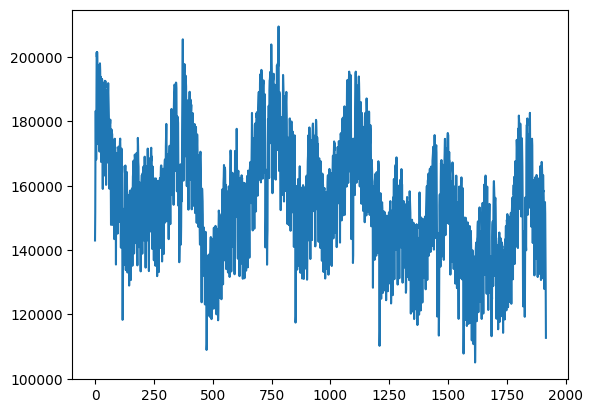

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df2.Consumption,label='Consumption data')
plt.show()

In [ ]:
df2['DateTime']=pd.to_datetime(df2['DateTime'])
df2['DateTime'].max()

Timestamp('2024-03-31 00:00:00')

In [ ]:
df['DateTime']=pd.to_datetime(df['DateTime'])
print(df.DateTime.min())
print(df.DateTime.max())

2011-01-01 00:00:00
2021-12-31 00:00:00


In [ ]:
print(df.DateTime.min())
print(df.DateTime.max())

2011-01-01 00:00:00
2021-12-31 00:00:00


### Training the LSTM model without manipulating both dataset using pytorch

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# === Preprocessing Data === #



# Load electricity data
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'])
electricity_clean = electricity_data[
    ['DateTime', 'Consumption', 'Nuclear', 'Wind', 'Hydroelectric',
     'Oil and Gas', 'Coal', 'Solar', 'Biomass']
]

# Load weather data
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')
weather_data['Date time'] = pd.to_datetime(weather_data['Date time'])
weather_clean = weather_data[
    ['Date time', 'Temperature', 'Dew Point', 'Relative Humidity',
     'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure']
]

# === Creating Datasets === #

class ElectricityDataset(Dataset):
    def __init__(self, data, sequence_length, target_column='Consumption'):
        self.data = data.drop(columns=['DateTime']).values
        self.target_column = data[target_column].values
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length, :]
        target = self.target_column[idx + self.sequence_length]
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data.drop(columns=['Date time']).values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Sequence length for electricity data
sequence_length = 24

# Create datasets
electricity_dataset = ElectricityDataset(electricity_clean, sequence_length)
weather_dataset = WeatherDataset(weather_clean)

# DataLoaders
batch_size = 32
electricity_loader = DataLoader(electricity_dataset, batch_size=batch_size, shuffle=True)
weather_loader = DataLoader(weather_dataset, batch_size=1, shuffle=False)

# === Defining the Model === #

class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()

        # Separate LSTMs for electricity and weather data
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)

        # Fully connected layer for combining features
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        # Process electricity data
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]

        # Process weather data
        weather_data = weather_data.unsqueeze(1)  # Add batch dimension
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]

        # Combine features and make prediction
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model parameters
electricity_input_size = electricity_clean.shape[1] - 1
weather_input_size = weather_clean.shape[1] - 1
hidden_size = 64
output_size = 1

# Initialize model
model = CombinedLSTMModel(electricity_input_size, weather_input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training Loop === #

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Iterate over electricity batches
    for i, (elec_inputs, elec_targets) in enumerate(electricity_loader):
        optimizer.zero_grad()

        # Get the corresponding weather sample (same index as electricity batch)
        weather_idx = i % len(weather_loader)
        weather_inputs = next(iter(weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        outputs = model(elec_inputs, weather_inputs_repeated)
        loss = criterion(outputs.squeeze(), elec_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(electricity_loader)}")

# === Prediction === #

model.eval()  # Set model to evaluation mode
predictions = []

with torch.no_grad():
    for elec_inputs, _ in electricity_loader:
        # Get the corresponding weather sample (first entry of the weather loader)
        weather_inputs = next(iter(weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        batch_predictions = model(elec_inputs, weather_inputs_repeated)
        predictions.extend(batch_predictions.squeeze().tolist())

print("Sample Predictions:", predictions[:10])  # Display the first 10 predictions


Epoch 1/10, Loss: 18083635.733049374
Epoch 2/10, Loss: 1084695.9949148123
Epoch 3/10, Loss: 1060199.1561630736
Epoch 4/10, Loss: 1055724.0922070583
Epoch 5/10, Loss: 1045346.3348400557
Epoch 6/10, Loss: 1028549.9900469402
Epoch 7/10, Loss: 1005230.733005911
Epoch 8/10, Loss: 1017288.1456667247
Epoch 9/10, Loss: 966749.6867611266
Epoch 10/10, Loss: 956646.7201625522
Sample Predictions: [6845.94091796875, 6263.0927734375, 6256.25537109375, 6256.25537109375, 6845.94091796875, 6256.25537109375, 6845.94091796875, 6256.25537109375, 6256.25537109375, 6256.25537109375]


Epoch 1/10, Loss: 0.018444577862414324
Epoch 2/10, Loss: 8.173808950469601e-05
Epoch 3/10, Loss: 6.80216687032953e-05
Epoch 4/10, Loss: 0.0001289359855115396
Epoch 5/10, Loss: 7.661891953593232e-05
Epoch 6/10, Loss: 6.022959364501098e-05
Epoch 7/10, Loss: 9.530726780568606e-05
Epoch 8/10, Loss: 8.521093264690811e-05
Epoch 9/10, Loss: 5.182237466669903e-05
Epoch 10/10, Loss: 6.751414966678883e-05


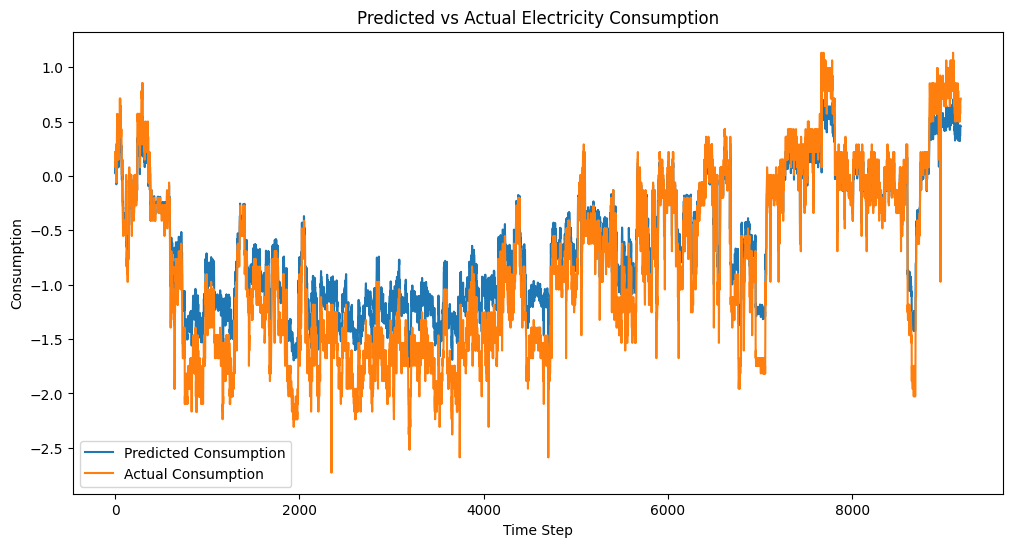

    Time Step  Actual Consumption  Predicted Consumption
0           0            0.221149               0.126283
1           1            0.221149               0.124478
2           2            0.221149               0.125011
3           3            0.221149               0.125330
4           4            0.080654               0.020779
5           5            0.150901               0.074709
6           6            0.150901               0.075522
7           7            0.221149               0.131729
8           8            0.221149               0.135002
9           9            0.150901               0.083002
10         10            0.221149               0.135868
11         11            0.291396               0.188474
12         12            0.080654               0.031735
13         13           -0.059841              -0.075808
14         14            0.221149               0.132880
15         15            0.291396               0.183093
16         16            0.2211

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === Load and Preprocess Data === #

# Load electricity data
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'])
electricity_clean = electricity_data[
    ['DateTime', 'Consumption', 'Nuclear', 'Wind', 'Hydroelectric',
     'Oil and Gas', 'Coal', 'Solar', 'Biomass']
]

# Load weather data
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')
weather_data['Date time'] = pd.to_datetime(weather_data['Date time'])
weather_clean = weather_data[
    ['Date time', 'Temperature', 'Dew Point', 'Relative Humidity',
     'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure']
]

# === Scaling Data === #

# Scale electricity data
electricity_scaler = StandardScaler()
electricity_scaled = electricity_clean.drop(columns=['DateTime']).values
electricity_clean_scaled = electricity_scaler.fit_transform(electricity_scaled)

# Scale weather data
weather_scaler = StandardScaler()
weather_scaled = weather_clean.drop(columns=['Date time']).values
weather_clean_scaled = weather_scaler.fit_transform(weather_scaled)

# === Train/Test Split === #

train_size = int(len(electricity_clean_scaled) * 0.8)
train_electricity = electricity_clean_scaled[:train_size]
test_electricity = electricity_clean_scaled[train_size:]

train_weather = weather_clean_scaled[:train_size]
test_weather = weather_clean_scaled[train_size:]

train_target = electricity_clean['Consumption'][:train_size]
test_target = electricity_clean['Consumption'][train_size:]

# === Creating Datasets === #

class ElectricityDataset(Dataset):
    def __init__(self, data, target_column='Consumption', sequence_length=24):
        self.data = data  # NumPy array of the dataset
        # Index of the target column (for example 'Consumption' should be column 1, i.e. index 1)
        self.target_column_index = data.columns.get_loc(target_column) if isinstance(data, pd.DataFrame) else -1
        self.target_column = data[:, self.target_column_index]  # Adjusted for NumPy array indexing
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length, :]
        target = self.target_column[idx + self.sequence_length - 1]  # Adjust the target index for correct value
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)
class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Sequence length for electricity data (e.g., 24 hours)
sequence_length = 24

# Create datasets for training and testing
train_electricity_dataset = ElectricityDataset(train_electricity, target_column='Consumption', sequence_length=24)
test_electricity_dataset = ElectricityDataset(test_electricity, target_column='Consumption', sequence_length=24)
train_weather_dataset = WeatherDataset(train_weather)
test_weather_dataset = WeatherDataset(test_weather)

# DataLoaders
batch_size = 32
train_electricity_loader = DataLoader(train_electricity_dataset, batch_size=batch_size, shuffle=True)
test_electricity_loader = DataLoader(test_electricity_dataset, batch_size=batch_size, shuffle=False)

train_weather_loader = DataLoader(train_weather_dataset, batch_size=1, shuffle=False)
test_weather_loader = DataLoader(test_weather_dataset, batch_size=1, shuffle=False)

# === Defining the Model === #

class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()

        # Separate LSTMs for electricity and weather data
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)

        # Fully connected layer for combining features
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        # Process electricity data
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]

        # Process weather data
        weather_data = weather_data.unsqueeze(1)  # Add batch dimension
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]

        # Combine features and make prediction
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model parameters
electricity_input_size = train_electricity.shape[1]
weather_input_size = train_weather.shape[1]
hidden_size = 64
output_size = 1

# Initialize model
model = CombinedLSTMModel(electricity_input_size, weather_input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training Loop === #

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Iterate over electricity batches
    for i, (elec_inputs, elec_targets) in enumerate(train_electricity_loader):
        optimizer.zero_grad()

        # Get the corresponding weather sample (same index as electricity batch)
        weather_idx = i % len(train_weather_loader)
        weather_inputs = next(iter(train_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        outputs = model(elec_inputs, weather_inputs_repeated)
        loss = criterion(outputs.squeeze(), elec_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_electricity_loader)}")

# === Prediction === #

model.eval()  # Set model to evaluation mode
predictions = []
actual_values = []

with torch.no_grad():
    for elec_inputs, elec_targets in test_electricity_loader:
        # Get the corresponding weather sample (first entry of the weather loader)
        weather_inputs = next(iter(test_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        batch_predictions = model(elec_inputs, weather_inputs_repeated)
        predictions.extend(batch_predictions.squeeze().tolist())
        actual_values.extend(elec_targets.tolist())


#=== Converting the data into actual scaler ===#
predictions_scaled = np.array(predictions).reshape(-1, 1)
actual_values_scaled = np.array(actual_values).reshape(-1, 1)
predictions_original_scale = electricity_scaler.inverse_transform(predictions_scaled)
actual_values_original_scale = electricity_scaler.inverse_transform(actual_values_scaled)
predictions_original_scale = predictions_original_scale.flatten()
actual_values_original_scale = actual_values_original_scale.flatten()




# === Plotting Results ===
plt.figure(figsize=(12, 6))
plt.plot(range(len(predictions_original_scale)), predictions_original_scale, label='Predicted Consumption')
plt.plot(range(len(actual_values_original_scale)),actual_values_original_scale, label='Actual Consumption')
plt.xlabel('Time Step')
plt.ylabel('Consumption')
plt.title('Predicted vs Actual Electricity Consumption')
plt.legend()
plt.show()

# === Display Predictions in Tabular Form ===
pred_df = pd.DataFrame({
    'Time Step': range(len(predictions_original_scale)),
    'Actual Consumption': actual_values_original_scale,
    'Predicted Consumption': predictions_original_scale
})

print(pred_df.head(20))  # Display first 20 rows


In [ ]:
print(electricity_data.Consumption.min())
print(electricity_data.Consumption.max())

3889
9615


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === Load and Preprocess Data === #

# Load electricity data
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'])
electricity_clean = electricity_data[
    ['DateTime', 'Consumption', 'Nuclear', 'Wind', 'Hydroelectric',
     'Oil and Gas', 'Coal', 'Solar', 'Biomass']
]

# Load weather data
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')
weather_data['Date time'] = pd.to_datetime(weather_data['Date time'])
weather_clean = weather_data[
    ['Date time', 'Temperature', 'Dew Point', 'Relative Humidity',
     'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure']
]

# === Scaling Data === #

# Scale electricity data (excluding 'DateTime' column)
electricity_scaler = StandardScaler()
electricity_scaled = electricity_clean.drop(columns=['DateTime']).values
electricity_clean_scaled = electricity_scaler.fit_transform(electricity_scaled)

# Scale weather data
weather_scaler = StandardScaler()
weather_scaled = weather_clean.drop(columns=['Date time']).values
weather_clean_scaled = weather_scaler.fit_transform(weather_scaled)

# === Train/Test Split === #

train_size = int(len(electricity_clean_scaled) * 0.8)
train_electricity = electricity_clean_scaled[:train_size]
test_electricity = electricity_clean_scaled[train_size:]

train_weather = weather_clean_scaled[:train_size]
test_weather = weather_clean_scaled[train_size:]

train_target = electricity_clean['Consumption'][:train_size]
test_target = electricity_clean['Consumption'][train_size:]

# === Creating Datasets === #

class ElectricityDataset(Dataset):
    def __init__(self, data, target_column='Consumption', sequence_length=24):
        self.data = data  # NumPy array of the dataset
        # Index of the target column (for example 'Consumption' should be column 1, i.e. index 1)
        self.target_column_index = data.columns.get_loc(target_column) if isinstance(data, pd.DataFrame) else -1
        self.target_column = data[:, self.target_column_index]  # Adjusted for NumPy array indexing
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length, :]
        target = self.target_column[idx + self.sequence_length - 1]  # Adjust the target index for correct value
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Sequence length for electricity data (e.g., 24 hours)
sequence_length = 24

# Create datasets for training and testing
train_electricity_dataset = ElectricityDataset(train_electricity, target_column='Consumption', sequence_length=24)
test_electricity_dataset = ElectricityDataset(test_electricity, target_column='Consumption', sequence_length=24)
train_weather_dataset = WeatherDataset(train_weather)
test_weather_dataset = WeatherDataset(test_weather)

# DataLoaders
batch_size = 32
train_electricity_loader = DataLoader(train_electricity_dataset, batch_size=batch_size, shuffle=True)
test_electricity_loader = DataLoader(test_electricity_dataset, batch_size=batch_size, shuffle=False)

train_weather_loader = DataLoader(train_weather_dataset, batch_size=1, shuffle=False)
test_weather_loader = DataLoader(test_weather_dataset, batch_size=1, shuffle=False)

# === Defining the Model === #

class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()

        # Separate LSTMs for electricity and weather data
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)

        # Fully connected layer for combining features
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        # Process electricity data
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]

        # Process weather data
        weather_data = weather_data.unsqueeze(1)  # Add batch dimension
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]

        # Combine features and make prediction
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model parameters
electricity_input_size = train_electricity.shape[1]
weather_input_size = train_weather.shape[1]
hidden_size = 64
output_size = 1

# Initialize model
model = CombinedLSTMModel(electricity_input_size, weather_input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training Loop === #

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Iterate over electricity batches
    for i, (elec_inputs, elec_targets) in enumerate(train_electricity_loader):
        optimizer.zero_grad()

        # Get the corresponding weather sample (same index as electricity batch)
        weather_idx = i % len(train_weather_loader)
        weather_inputs = next(iter(train_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        outputs = model(elec_inputs, weather_inputs_repeated)
        loss = criterion(outputs.squeeze(), elec_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_electricity_loader)}")

# === Prediction === #

model.eval()  # Set model to evaluation mode
predictions = []
actual_values = []

with torch.no_grad():
    for elec_inputs, elec_targets in test_electricity_loader:
        # Get the corresponding weather sample (first entry of the weather loader)
        weather_inputs = next(iter(test_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        batch_predictions = model(elec_inputs, weather_inputs_repeated)
        predictions.extend(batch_predictions.squeeze().tolist())
        actual_values.extend(elec_targets.tolist())


#=== Converting the data into actual scaler ===#
# Here we are directly using the scaler as it was trained on the full features
predictions_scaled = np.array(predictions).reshape(-1, 1)  # Reshape to 2D (single column)
actual_values_scaled = np.array(actual_values).reshape(-1, 1)  # Reshape to 2D (single column)

# Inverse transform the scaled values back to the original scale
predictions_original_scale = electricity_scaler.inverse_transform(predictions_scaled)
actual_values_original_scale = electricity_scaler.inverse_transform(actual_values_scaled)

# Flatten the arrays to get 1D arrays
predictions_original_scale = predictions_original_scale.flatten()
actual_values_original_scale = actual_values_original_scale.flatten()

# === Plotting Results ===
plt.figure(figsize=(12, 6))
plt.plot(range(len(predictions_original_scale)), predictions_original_scale, label='Predicted Consumption')
plt.plot(range(len(actual_values_original_scale)), actual_values_original_scale, label='Actual Consumption')
plt.xlabel('Time Step')
plt.ylabel('Consumption')
plt.title('Predicted vs Actual Electricity Consumption')
plt.legend()
plt.show()

# === Display Predictions in Tab


In [ ]:
# === Converting the data into actual scale ===#
# Reshape predictions and actual values to 2D for inverse transformation
predictions_scaled = np.array(predictions).reshape(-1, 1)  # Reshape to 2D (single column)
actual_values_scaled = np.array(actual_values).reshape(-1, 1)  # Reshape to 2D (single column)

# Inverse transform the scaled values back to the original scale (for 'Consumption' only)
# The scaler is fitted on the entire dataset, so inverse transformation should be done only on the 'Consumption' column
predictions_original_scale = electricity_scaler.inverse_transform(np.concatenate([predictions_scaled, np.zeros_like(predictions_scaled)], axis=1))[:, 0]
actual_values_original_scale = electricity_scaler.inverse_transform(np.concatenate([actual_values_scaled, np.zeros_like(actual_values_scaled)], axis=1))[:, 0]

# === Plotting Results ===
plt.figure(figsize=(12, 6))
plt.plot(range(len(predictions_original_scale)), predictions_original_scale, label='Predicted Consumption')
plt.plot(range(len(actual_values_original_scale)), actual_values_original_scale, label='Actual Consumption')
plt.xlabel('Time Step')
plt.ylabel('Consumption')
plt.title('Predicted vs Actual Electricity Consumption')
plt.legend()
plt.show()

# === Display Predictions in Tabular Form ===
pred_df = pd.DataFrame({
    'Time Step': range(len(predictions_original_scale)),
    'Actual Consumption': actual_values_original_scale,
    'Predicted Consumption': predictions_original_scale
})

print(pred_df.head(20))  # Display first 20 rows


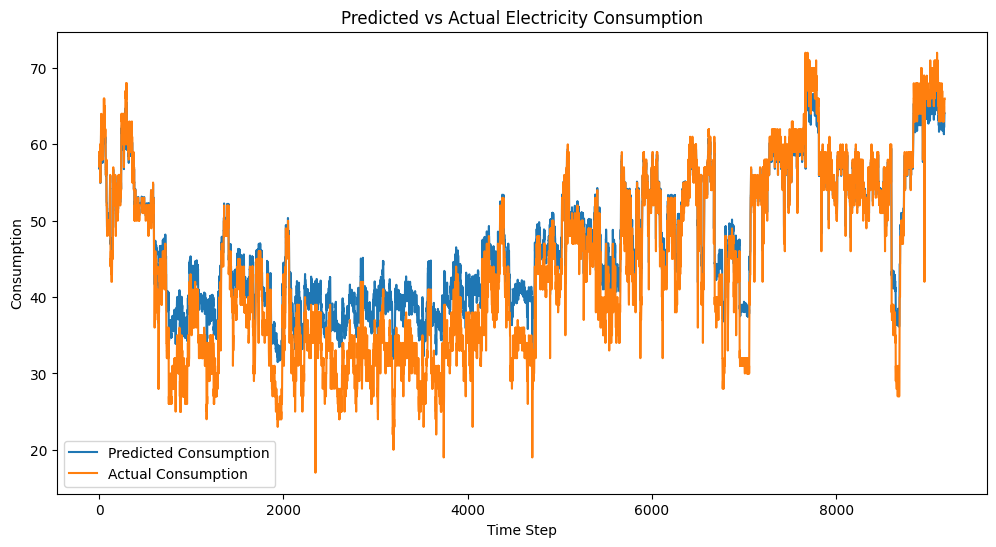

    Time Step  Actual Consumption  Predicted Consumption
0           0                59.0              58.504879
1           1                59.0              58.510693
2           2                59.0              58.503117
3           3                59.0              58.500225
4           4                57.0              56.745605
5           5                58.0              57.604823
6           6                58.0              57.595220
7           7                59.0              58.488244
8           8                59.0              58.482022
9           9                58.0              57.571636
10         10                59.0              58.485145
11         11                60.0              59.399462
12         12                57.0              56.704963
13         13                55.0              54.933048
14         14                59.0              58.538552
15         15                60.0              59.388940
16         16                59

In [ ]:
# === Converting the data into actual scale ===#
# Reshape predictions and actual values to 2D for inverse transformation
predictions_scaled = np.array(predictions).reshape(-1, 1)  # Reshape to 2D (single column)
actual_values_scaled = np.array(actual_values).reshape(-1, 1)  # Reshape to 2D (single column)

# Extract the input features from the original dataset (excluding 'Consumption')
train_features = train_electricity[:, 1:]  # Excluding 'Consumption' column

# Combine the input features with the predicted and actual values (scaled)
# Predictions and actual values only in the 'Consumption' column, rest set to zero
predictions_combined = np.concatenate([train_features[:len(predictions_scaled)], predictions_scaled], axis=1)
actual_values_combined = np.concatenate([train_features[:len(actual_values_scaled)], actual_values_scaled], axis=1)

# Inverse transform the combined array back to the original scale (scaled)
# The input features (train_features) will stay the same, we only reverse the scaling for 'Consumption'
predictions_original_scale = electricity_scaler.inverse_transform(predictions_combined)[:, -1]  # Extract 'Consumption' from last column
actual_values_original_scale = electricity_scaler.inverse_transform(actual_values_combined)[:, -1]  # Extract 'Consumption' from last column

# === Plotting Results ===
plt.figure(figsize=(12, 6))
plt.plot(range(len(predictions_original_scale)), predictions_original_scale, label='Predicted Consumption')
plt.plot(range(len(actual_values_original_scale)), actual_values_original_scale, label='Actual Consumption')
plt.xlabel('Time Step')
plt.ylabel('Consumption')
plt.title('Predicted vs Actual Electricity Consumption')
plt.legend()
plt.show()

# === Display Predictions in Tabular Form ===
pred_df = pd.DataFrame({
    'Time Step': range(len(predictions_original_scale)),
    'Actual Consumption': actual_values_original_scale,
    'Predicted Consumption': predictions_original_scale
})

print(pred_df.head(20))  # Display first 20 rows


Epoch 1/10, Loss: 0.018461313465095767
Epoch 2/10, Loss: 0.00010976596578510235
Epoch 3/10, Loss: 8.295956522409182e-05
Epoch 4/10, Loss: 8.267121262574422e-05
Epoch 5/10, Loss: 0.0001453329732090503
Epoch 6/10, Loss: 9.601813956499467e-05
Epoch 7/10, Loss: 6.67909723231629e-05
Epoch 8/10, Loss: 7.582788941343334e-05
Epoch 9/10, Loss: 7.593064938606878e-05
Epoch 10/10, Loss: 5.977180484577453e-05


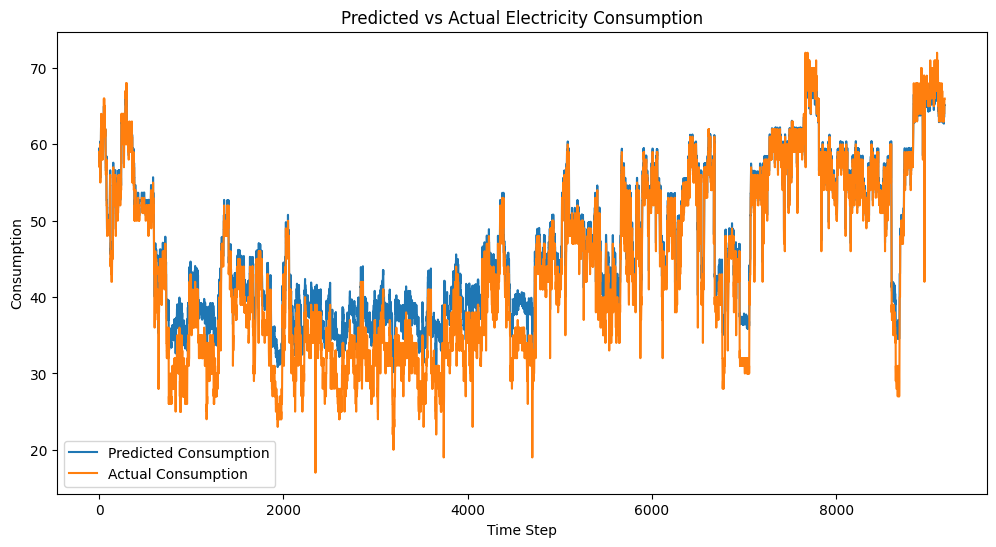

   Time Step  Predicted Consumption  Actual Consumption
0          0              59.441917                59.0
1          1              59.437613                59.0
2          2              59.424960                59.0
3          3              59.427523                59.0
4          4              57.528829                57.0


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# === Load and Preprocess Data === #

# Load electricity data
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'])
electricity_clean = electricity_data[
    ['DateTime', 'Consumption', 'Nuclear', 'Wind', 'Hydroelectric',
     'Oil and Gas', 'Coal', 'Solar', 'Biomass']
]

# Load weather data
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')
weather_data['Date time'] = pd.to_datetime(weather_data['Date time'])
weather_clean = weather_data[
    ['Date time', 'Temperature', 'Dew Point', 'Relative Humidity',
     'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure']
]

# === Scaling Data === #

# Scale electricity data (excluding 'DateTime' column)
electricity_scaler = StandardScaler()
electricity_scaled = electricity_clean.drop(columns=['DateTime']).values
electricity_clean_scaled = electricity_scaler.fit_transform(electricity_scaled)

# Scale weather data (excluding 'Date time' column)
weather_scaler = StandardScaler()
weather_scaled = weather_clean.drop(columns=['Date time']).values
weather_clean_scaled = weather_scaler.fit_transform(weather_scaled)

# === Train/Test Split === #

train_size = int(len(electricity_clean_scaled) * 0.8)
train_electricity = electricity_clean_scaled[:train_size]
test_electricity = electricity_clean_scaled[train_size:]

train_weather = weather_clean_scaled[:train_size]
test_weather = weather_clean_scaled[train_size:]

train_target = electricity_clean['Consumption'][:train_size]
test_target = electricity_clean['Consumption'][train_size:]

# === Creating Datasets === #

class ElectricityDataset(Dataset):
    def __init__(self, data, target_column='Consumption', sequence_length=24):
        self.data = data  # NumPy array of the dataset
        self.target_column_index = data.columns.get_loc(target_column) if isinstance(data, pd.DataFrame) else -1
        self.target_column = data[:, self.target_column_index]  # Adjusted for NumPy array indexing
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length, :]
        target = self.target_column[idx + self.sequence_length - 1]  # Adjust the target index for correct value
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Sequence length for electricity data (e.g., 24 hours)
sequence_length = 24

# Create datasets for training and testing
train_electricity_dataset = ElectricityDataset(train_electricity, target_column='Consumption', sequence_length=24)
test_electricity_dataset = ElectricityDataset(test_electricity, target_column='Consumption', sequence_length=24)
train_weather_dataset = WeatherDataset(train_weather)
test_weather_dataset = WeatherDataset(test_weather)

# DataLoaders
batch_size = 32
train_electricity_loader = DataLoader(train_electricity_dataset, batch_size=batch_size, shuffle=True)
test_electricity_loader = DataLoader(test_electricity_dataset, batch_size=batch_size, shuffle=False)

train_weather_loader = DataLoader(train_weather_dataset, batch_size=1, shuffle=False)
test_weather_loader = DataLoader(test_weather_dataset, batch_size=1, shuffle=False)

# === Defining the Model === #

class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()

        # Separate LSTMs for electricity and weather data
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)

        # Fully connected layer for combining features
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        # Process electricity data
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]

        # Process weather data
        weather_data = weather_data.unsqueeze(1)  # Add batch dimension
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]

        # Combine features and make prediction
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model parameters
electricity_input_size = train_electricity.shape[1]
weather_input_size = train_weather.shape[1]
hidden_size = 64
output_size = 1

# Initialize model
model = CombinedLSTMModel(electricity_input_size, weather_input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training Loop === #

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Iterate over electricity batches
    for i, (elec_inputs, elec_targets) in enumerate(train_electricity_loader):
        optimizer.zero_grad()

        # Get the corresponding weather sample (same index as electricity batch)
        weather_idx = i % len(train_weather_loader)
        weather_inputs = next(iter(train_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        outputs = model(elec_inputs, weather_inputs_repeated)
        loss = criterion(outputs.squeeze(), elec_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_electricity_loader)}")

# === Prediction === #

model.eval()  # Set model to evaluation mode
predictions = []
actual_values = []

with torch.no_grad():
    for elec_inputs, elec_targets in test_electricity_loader:
        # Get the corresponding weather sample (first entry of the weather loader)
        weather_inputs = next(iter(test_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        batch_predictions = model(elec_inputs, weather_inputs_repeated)
        predictions.extend(batch_predictions.squeeze().tolist())
        actual_values.extend(elec_targets.tolist())


# === Converting the data into actual scale ===#
# Reshape predictions and actual values to 2D for inverse transformation
predictions_scaled = np.array(predictions).reshape(-1, 1)  # Reshape to 2D (single column)
actual_values_scaled = np.array(actual_values).reshape(-1, 1)  # Reshape to 2D (single column)

# Extract the input features from the original dataset (excluding 'Consumption')
train_features = train_electricity[:, 1:]  # Excluding 'Consumption' column

# Combine the input features with the predicted and actual values (scaled)
# Predictions and actual values only in the 'Consumption' column, rest set to zero
predictions_combined = np.concatenate([train_features[:len(predictions_scaled)], predictions_scaled], axis=1)
actual_values_combined = np.concatenate([train_features[:len(actual_values_scaled)], actual_values_scaled], axis=1)

# Inverse transform the combined array back to the original scale (scaled)
# The input features (train_features) will stay the same, we only reverse the scaling for 'Consumption'
predictions_original_scale = electricity_scaler.inverse_transform(predictions_combined)[:, -1]  # Extract 'Consumption' from last column
actual_values_original_scale = electricity_scaler.inverse_transform(actual_values_combined)[:, -1]  # Extract 'Consumption' from last column

# === Plotting Results ===
plt.figure(figsize=(12, 6))
plt.plot(range(len(predictions_original_scale)), predictions_original_scale, label="Predicted Consumption")
plt.plot(range(len(actual_values_original_scale)), actual_values_original_scale, label="Actual Consumption")
plt.xlabel('Time Step')
plt.ylabel('Consumption')
plt.title('Predicted vs Actual Electricity Consumption')
plt.legend()
plt.show()

# === Display Predictions in Tabular Form ===
pred_df = pd.DataFrame({
    'Time Step': range(len(predictions_original_scale)),
    'Predicted Consumption': predictions_original_scale,
    'Actual Consumption': actual_values_original_scale
})
print(pred_df.head())


In [ ]:
# === Scaling Data === #

# Scale electricity data (excluding 'DateTime' and 'Consumption' column)
electricity_scaler = StandardScaler()
electricity_features = electricity_clean.drop(columns=['DateTime', 'Consumption']).values
electricity_target = electricity_clean['Consumption'].values
electricity_clean_scaled = electricity_scaler.fit_transform(electricity_features)

# Scale weather data (excluding 'Date time' column)
weather_scaler = StandardScaler()
weather_scaled = weather_clean.drop(columns=['Date time']).values
weather_clean_scaled = weather_scaler.fit_transform(weather_scaled)

# === Train/Test Split === #

train_size = int(len(electricity_clean_scaled) * 0.8)
train_electricity = electricity_clean_scaled[:train_size]
test_electricity = electricity_clean_scaled[train_size:]

train_weather = weather_clean_scaled[:train_size]
test_weather = weather_clean_scaled[train_size:]

train_target = electricity_target[:train_size]
test_target = electricity_target[train_size:]

# === Creating Datasets === #

class ElectricityDataset(Dataset):
    def __init__(self, data, target_column='Consumption', sequence_length=24):
        self.data = data  # NumPy array of the dataset
        self.target_column_index = data.columns.get_loc(target_column) if isinstance(data, pd.DataFrame) else -1
        self.target_column = data[:, self.target_column_index]  # Adjusted for NumPy array indexing
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length, :]
        target = self.target_column[idx + self.sequence_length - 1]  # Adjust the target index for correct value
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Sequence length for electricity data (e.g., 24 hours)
sequence_length = 24

# Create datasets for training and testing
train_electricity_dataset = ElectricityDataset(train_electricity, target_column='Consumption', sequence_length=24)
test_electricity_dataset = ElectricityDataset(test_electricity, target_column='Consumption', sequence_length=24)
train_weather_dataset = WeatherDataset(train_weather)
test_weather_dataset = WeatherDataset(test_weather)

# DataLoaders
batch_size = 32
train_electricity_loader = DataLoader(train_electricity_dataset, batch_size=batch_size, shuffle=True)
test_electricity_loader = DataLoader(test_electricity_dataset, batch_size=batch_size, shuffle=False)

train_weather_loader = DataLoader(train_weather_dataset, batch_size=1, shuffle=False)
test_weather_loader = DataLoader(test_weather_dataset, batch_size=1, shuffle=False)

# === Defining the Model === #

class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()

        # Separate LSTMs for electricity and weather data
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)

        # Fully connected layer for combining features
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        # Process electricity data
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]

        # Process weather data
        weather_data = weather_data.unsqueeze(1)  # Add batch dimension
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]

        # Combine features and make prediction
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model parameters
electricity_input_size = train_electricity.shape[1]
weather_input_size = train_weather.shape[1]
hidden_size = 64
output_size = 1

# Initialize model
model = CombinedLSTMModel(electricity_input_size, weather_input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training Loop === #

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Iterate over electricity batches
    for i, (elec_inputs, elec_targets) in enumerate(train_electricity_loader):
        optimizer.zero_grad()

        # Get the corresponding weather sample (same index as electricity batch)
        weather_idx = i % len(train_weather_loader)
        weather_inputs = next(iter(train_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        outputs = model(elec_inputs, weather_inputs_repeated)
        loss = criterion(outputs.squeeze(), elec_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_electricity_loader)}")

# === Prediction === #

model.eval()  # Set model to evaluation mode
predictions = []
actual_values = []

with torch.no_grad():
    for elec_inputs, elec_targets in test_electricity_loader:
        # Get the corresponding weather sample (first entry of the weather loader)
        weather_inputs = next(iter(test_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        batch_predictions = model(elec_inputs, weather_inputs_repeated)
        predictions.extend(batch_predictions.squeeze().tolist())
        actual_values.extend(elec_targets.tolist())

# === Reshape for Inverse Scaling === #
# Reshape predictions and actual values to 2D for inverse transformation
predictions_scaled = np.array(predictions).reshape(-1, 1)  # Reshape to 2D (single column)
actual_values_scaled = np.array(actual_values).reshape(-1, 1)  # Reshape to 2D (single column)

# Reverse scale the predictions and actual values back to the original scale of 'Consumption'
# Note: We only inverse transform the target (Consumption), keeping the feature columns unchanged
predictions_combined = np.concatenate([train_electricity[:len(predictions_scaled), :], predictions_scaled], axis=1)
actual_values_combined = np.concatenate([train_electricity[:len(actual_values_scaled), :], actual_values_scaled], axis=1)

# Inverse transform the combined array back to the original scale
predictions_original_scale = electricity_scaler.inverse_transform(predictions_combined)[:, -1]  # Extract 'Consumption'
actual_values_original_scale = electricity_scaler.inverse_transform(actual_values_combined)[:, -1]  # Extract 'Consumption'

# === Plotting Results ===
plt.figure(figsize=(12, 6))
plt.plot(range(len(predictions_original_scale)), predictions_original_scale, label="Predicted Consumption")
plt.plot(range(len(actual_values_original_scale)), actual_values_original_scale, label="Actual Consumption")
plt.xlabel('Time Step')
plt.ylabel('Consumption')
plt.title('Predicted vs Actual Electricity Consumption')
plt.legend()
plt.show()

# === Display Predictions in Tabular Form ===
pred_df = pd.DataFrame({
    'Time Step': range(len(predictions_original_scale)),
    'Predicted Consumption': predictions_original_scale,
    'Actual Consumption': actual_values_original_scale
})
print(pred_df.head())


Epoch 1/10, Loss: 0.02197533671774537
Epoch 2/10, Loss: 9.338896758693052e-05
Epoch 3/10, Loss: 6.252414568892994e-05
Epoch 4/10, Loss: 9.767188036794718e-05
Epoch 5/10, Loss: 0.0001359007637782507
Epoch 6/10, Loss: 4.528372743963068e-05
Epoch 7/10, Loss: 8.092454221083324e-05
Epoch 8/10, Loss: 6.470078511681451e-05
Epoch 9/10, Loss: 8.031369864926565e-05
Epoch 10/10, Loss: 4.210194499582149e-05


ValueError: operands could not be broadcast together with shapes (9179,8) (7,) (9179,8) 

### ****************************************************

### Working code of combining two dataset of different time frame and predicting the output

Epoch 1/10, Loss: 0.02016920200250752
Epoch 2/10, Loss: 9.040431367912274e-05
Epoch 3/10, Loss: 8.045031191337014e-05
Epoch 4/10, Loss: 0.0001060262845594875
Epoch 5/10, Loss: 5.9562712210960024e-05
Epoch 6/10, Loss: 9.892137686481716e-05
Epoch 7/10, Loss: 9.382437117813464e-05
Epoch 8/10, Loss: 4.665750707258469e-05
Epoch 9/10, Loss: 5.6581121767996354e-05
Epoch 10/10, Loss: 0.00011422196651418072


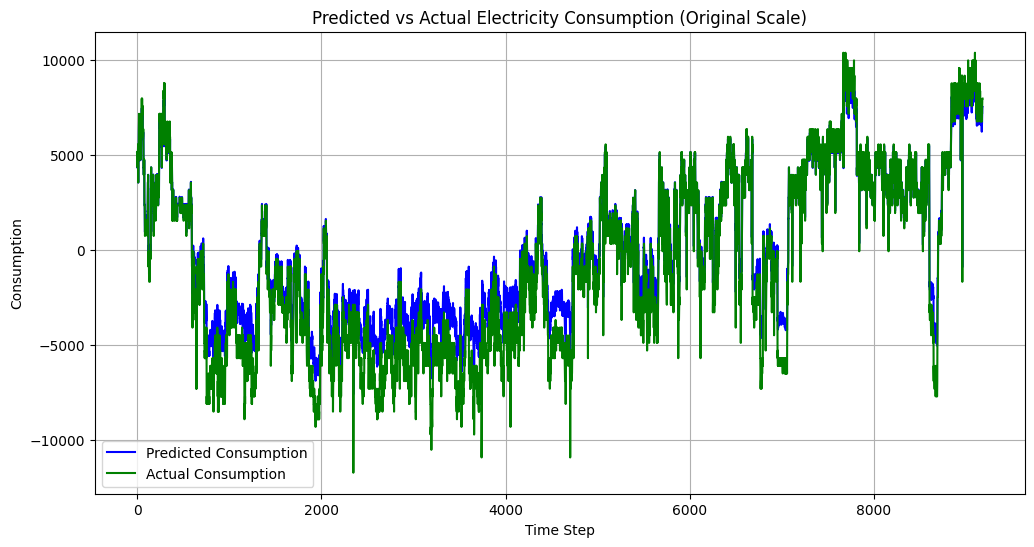

RMSE (Original Scale): 1294.3392
MAE (Original Scale): 948.6998
   Time Step  Predicted Consumption  Actual Consumption  Absolute Error
0          0            5106.810697         5155.296856       48.486159
1          1            5104.181181         5155.296856       51.115675
2          2            5108.095934         5155.296856       47.200923
3          3            5105.819317         5155.296856       49.477539
4          4            4322.841945         4350.823454       27.981510


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# === Load and Preprocess Data === #

# Load electricity data
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'])
electricity_clean = electricity_data[
    ['DateTime', 'Consumption', 'Nuclear', 'Wind', 'Hydroelectric',
     'Oil and Gas', 'Coal', 'Solar', 'Biomass']
]

# Load weather data
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')
weather_data['Date time'] = pd.to_datetime(weather_data['Date time'])
weather_clean = weather_data[
    ['Date time', 'Temperature', 'Dew Point', 'Relative Humidity',
     'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure']
]

# === Scaling Data === #

# Scale electricity data (excluding 'DateTime' column)
electricity_scaler = StandardScaler()
electricity_scaled = electricity_clean.drop(columns=['DateTime', 'Consumption']).values
electricity_clean_scaled = electricity_scaler.fit_transform(electricity_scaled)

# Scale 'Consumption' using MinMaxScaler
consumption_scaler = MinMaxScaler(feature_range=(0, 1))
consumption_scaled = consumption_scaler.fit_transform(electricity_clean[['Consumption']])

# Scale weather data (excluding 'Date time' column)
weather_scaler = StandardScaler()
weather_scaled = weather_clean.drop(columns=['Date time']).values
weather_clean_scaled = weather_scaler.fit_transform(weather_scaled)

# === Train/Test Split === #

train_size = int(len(electricity_clean_scaled) * 0.8)
train_electricity = electricity_clean_scaled[:train_size]
test_electricity = electricity_clean_scaled[train_size:]

train_weather = weather_clean_scaled[:train_size]
test_weather = weather_clean_scaled[train_size:]

train_target = consumption_scaled[:train_size]
test_target = consumption_scaled[train_size:]

# === Creating Datasets === #

class ElectricityDataset(Dataset):
    def __init__(self, data, target_column='Consumption', sequence_length=24):
        self.data = data  # NumPy array of the dataset
        self.target_column_index = data.columns.get_loc(target_column) if isinstance(data, pd.DataFrame) else -1
        self.target_column = data[:, self.target_column_index]  # Adjusted for NumPy array indexing
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length, :]
        target = self.target_column[idx + self.sequence_length - 1]  # Adjust the target index for correct value
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Sequence length for electricity data (e.g., 24 hours)
sequence_length = 24

# Create datasets for training and testing
train_electricity_dataset = ElectricityDataset(train_electricity, target_column='Consumption', sequence_length=24)
test_electricity_dataset = ElectricityDataset(test_electricity, target_column='Consumption', sequence_length=24)
train_weather_dataset = WeatherDataset(train_weather)
test_weather_dataset = WeatherDataset(test_weather)

# DataLoaders
batch_size = 32
train_electricity_loader = DataLoader(train_electricity_dataset, batch_size=batch_size, shuffle=True)
test_electricity_loader = DataLoader(test_electricity_dataset, batch_size=batch_size, shuffle=False)

train_weather_loader = DataLoader(train_weather_dataset, batch_size=1, shuffle=False)
test_weather_loader = DataLoader(test_weather_dataset, batch_size=1, shuffle=False)

# === Defining the Model === #

class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()

        # Separate LSTMs for electricity and weather data
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)

        # Fully connected layer for combining features
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        # Process electricity data
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]

        # Process weather data
        weather_data = weather_data.unsqueeze(1)  # Add batch dimension
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]

        # Combine features and make prediction
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model parameters
electricity_input_size = train_electricity.shape[1]
weather_input_size = train_weather.shape[1]
hidden_size = 64
output_size = 1

# Initialize model
model = CombinedLSTMModel(electricity_input_size, weather_input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training Loop === #

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Iterate over electricity batches
    for i, (elec_inputs, elec_targets) in enumerate(train_electricity_loader):
        optimizer.zero_grad()

        # Get the corresponding weather sample (same index as electricity batch)
        weather_idx = i % len(train_weather_loader)
        weather_inputs = next(iter(train_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        outputs = model(elec_inputs, weather_inputs_repeated)
        loss = criterion(outputs.squeeze(), elec_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_electricity_loader)}")

# === Prediction === #

model.eval()  # Set model to evaluation mode
predictions = []
actual_values = []

with torch.no_grad():
    for elec_inputs, elec_targets in test_electricity_loader:
        # Get the corresponding weather sample (first entry of the weather loader)
        weather_inputs = next(iter(test_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        batch_predictions = model(elec_inputs, weather_inputs_repeated)
        predictions.extend(batch_predictions.squeeze().tolist())
        actual_values.extend(elec_targets.tolist())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Inverse Transform the Scaled Values === #
# Inverse transform the predicted and actual values (scaled) using the MinMaxScaler for the target column ('Consumption')
predictions_original_scale = consumption_scaler.inverse_transform(predictions_scaled)
actual_values_original_scale = consumption_scaler.inverse_transform(actual_values_scaled)

# === Calculate Errors === #
# Calculate absolute error between predicted and actual values
absolute_error = np.abs(predictions_original_scale - actual_values_original_scale)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values_original_scale, predictions_original_scale))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values_original_scale, predictions_original_scale)

# === Plotting Results === #
plt.figure(figsize=(12, 6))
plt.plot(range(len(predictions_original_scale)), predictions_original_scale, label="Predicted Consumption", color='blue')
plt.plot(range(len(actual_values_original_scale)), actual_values_original_scale, label="Actual Consumption", color='green')
plt.xlabel('Time Step')
plt.ylabel('Consumption')
plt.title('Predicted vs Actual Electricity Consumption (Original Scale)')
plt.legend()
plt.grid(True)
plt.show()

# === Display Error Statistics === #
print(f"RMSE (Original Scale): {rmse:.4f}")
print(f"MAE (Original Scale): {mae:.4f}")

# === Display Predictions and Errors in Tabular Form === #
error_df = pd.DataFrame({
    'Time Step': range(len(predictions_original_scale)),
    'Predicted Consumption': predictions_original_scale.flatten(),
    'Actual Consumption': actual_values_original_scale.flatten(),
    'Absolute Error': absolute_error.flatten()
})

print(error_df.head())

Epoch 1/10, Loss: 0.019099907785215614
Epoch 2/10, Loss: 7.839920949940595e-05
Epoch 3/10, Loss: 7.758315743874687e-05
Epoch 4/10, Loss: 8.854794758640903e-05
Epoch 5/10, Loss: 6.554899944168701e-05
Epoch 6/10, Loss: 0.00010545253917094353
Epoch 7/10, Loss: 5.06165391512379e-05
Epoch 8/10, Loss: 7.091966094222976e-05
Epoch 9/10, Loss: 7.106252136014992e-05
Epoch 10/10, Loss: 0.00012967618027212902
Mean Absolute Error (MAE): 880.33
Root Mean Squared Error (RMSE): 1151.32
             DateTime       Actual    Predicted  Absolute Error
0 2023-03-14 12:00:00  5155.296856  4865.396198      289.900658
1 2023-03-14 13:00:00  5155.296856  4873.520072      281.776784
2 2023-03-14 14:00:00  5155.296856  4876.978085      278.318771
3 2023-03-14 15:00:00  5155.296856  4877.347879      277.948977
4 2023-03-14 16:00:00  4350.823454  4126.973935      223.849520


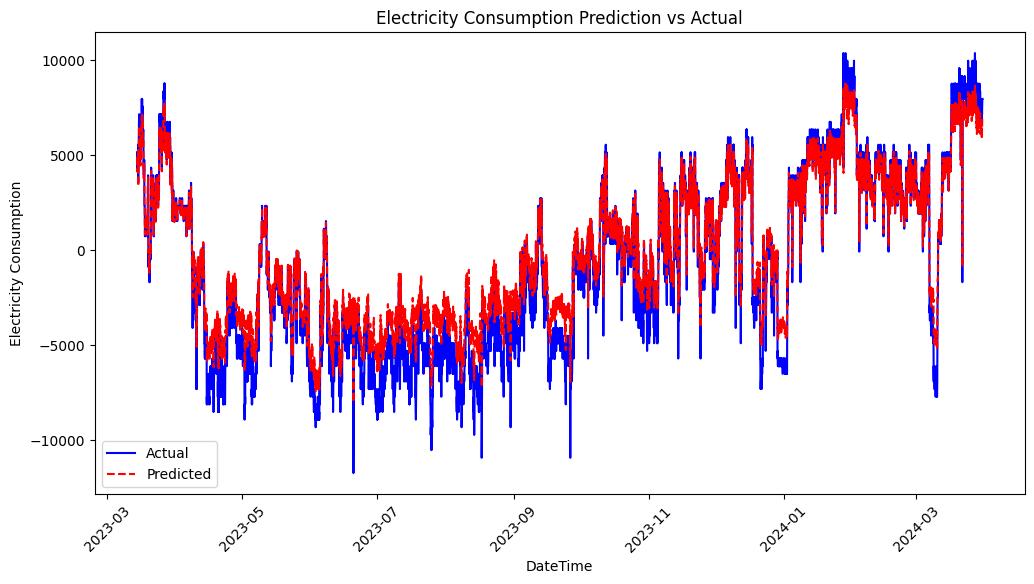

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Load and Preprocess Data === #

# Load electricity data
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'])
electricity_clean = electricity_data[
    ['DateTime', 'Consumption', 'Nuclear', 'Wind', 'Hydroelectric',
     'Oil and Gas', 'Coal', 'Solar', 'Biomass']
]

# Load weather data
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')
weather_data['Date time'] = pd.to_datetime(weather_data['Date time'])
weather_clean = weather_data[
    ['Date time', 'Temperature', 'Dew Point', 'Relative Humidity',
     'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure']
]

# === Scaling Data === #

# Scale electricity data (excluding 'DateTime' column)
electricity_scaler = StandardScaler()
electricity_scaled = electricity_clean.drop(columns=['DateTime', 'Consumption']).values
electricity_clean_scaled = electricity_scaler.fit_transform(electricity_scaled)

# Scale 'Consumption' using MinMaxScaler
consumption_scaler = MinMaxScaler(feature_range=(0, 1))
consumption_scaled = consumption_scaler.fit_transform(electricity_clean[['Consumption']])

# Scale weather data (excluding 'Date time' column)
weather_scaler = StandardScaler()
weather_scaled = weather_clean.drop(columns=['Date time']).values
weather_clean_scaled = weather_scaler.fit_transform(weather_scaled)

# === Train/Test Split === #

train_size = int(len(electricity_clean_scaled) * 0.8)
train_electricity = electricity_clean_scaled[:train_size]
test_electricity = electricity_clean_scaled[train_size:]

train_weather = weather_clean_scaled[:train_size]
test_weather = weather_clean_scaled[train_size:]

train_target = consumption_scaled[:train_size]
test_target = consumption_scaled[train_size:]

# === Creating Datasets === #

class ElectricityDataset(Dataset):
    def __init__(self, data, target_column='Consumption', sequence_length=24):
        self.data = data  # NumPy array of the dataset
        self.target_column_index = data.columns.get_loc(target_column) if isinstance(data, pd.DataFrame) else -1
        self.target_column = data[:, self.target_column_index]  # Adjusted for NumPy array indexing
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length, :]
        target = self.target_column[idx + self.sequence_length - 1]  # Adjust the target index for correct value
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Sequence length for electricity data (e.g., 24 hours)
sequence_length = 24

# Create datasets for training and testing
train_electricity_dataset = ElectricityDataset(train_electricity, target_column='Consumption', sequence_length=24)
test_electricity_dataset = ElectricityDataset(test_electricity, target_column='Consumption', sequence_length=24)
train_weather_dataset = WeatherDataset(train_weather)
test_weather_dataset = WeatherDataset(test_weather)

# DataLoaders
batch_size = 32
train_electricity_loader = DataLoader(train_electricity_dataset, batch_size=batch_size, shuffle=True)
test_electricity_loader = DataLoader(test_electricity_dataset, batch_size=batch_size, shuffle=False)

train_weather_loader = DataLoader(train_weather_dataset, batch_size=1, shuffle=False)
test_weather_loader = DataLoader(test_weather_dataset, batch_size=1, shuffle=False)

# === Defining the Model === #

class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()

        # Separate LSTMs for electricity and weather data
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)

        # Fully connected layer for combining features
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        # Process electricity data
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]

        # Process weather data
        weather_data = weather_data.unsqueeze(1)  # Add batch dimension
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]

        # Combine features and make prediction
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model parameters
electricity_input_size = train_electricity.shape[1]
weather_input_size = train_weather.shape[1]
hidden_size = 64
output_size = 1

# Initialize model
model = CombinedLSTMModel(electricity_input_size, weather_input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training Loop === #

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Iterate over electricity batches
    for i, (elec_inputs, elec_targets) in enumerate(train_electricity_loader):
        optimizer.zero_grad()

        # Get the corresponding weather sample (same index as electricity batch)
        weather_idx = i % len(train_weather_loader)
        weather_inputs = next(iter(train_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        outputs = model(elec_inputs, weather_inputs_repeated)
        loss = criterion(outputs.squeeze(), elec_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_electricity_loader)}")

# === Prediction === #

model.eval()  # Set model to evaluation mode
predictions = []
actual_values = []
timestamps = []  # To store the corresponding timestamps

with torch.no_grad():
    for elec_inputs, elec_targets in test_electricity_loader:
        # Get the corresponding weather sample (first entry of the weather loader)
        weather_inputs = next(iter(test_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        batch_predictions = model(elec_inputs, weather_inputs_repeated)
        predictions.extend(batch_predictions.squeeze().tolist())
        actual_values.extend(elec_targets.tolist())

        # Get the corresponding timestamps for the current batch
        batch_timestamps = electricity_clean.iloc[train_size + len(predictions) - len(elec_inputs):train_size + len(predictions)]["DateTime"]
        print(len(predictions), len(elec_inputs):train_size, len(predictions))
        print(batch_timestamps)
        timestamps.extend(batch_timestamps.tolist())

# === Inverse Transform the Scaled Values === #
# Inverse transform the predicted and actual values (scaled) using the MinMaxScaler for the target column ('Consumption')
predictions_original_scale = consumption_scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
actual_values_original_scale = consumption_scaler.inverse_transform(np.array(actual_values).reshape(-1, 1))

# === Calculate Errors === #
# Calculate absolute error between predicted and actual values
absolute_error = np.abs(predictions_original_scale - actual_values_original_scale)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values_original_scale, predictions_original_scale))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values_original_scale, predictions_original_scale)

# === Display Results === #

# Print MAE and RMSE
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Display first few rows of predictions with timestamps
results_df = pd.DataFrame({
    'DateTime': timestamps,
    'Actual': actual_values_original_scale.flatten(),
    'Predicted': predictions_original_scale.flatten(),
    'Absolute Error': absolute_error.flatten()
})
print(results_df.head())

# === Plot Predictions vs Actual === #

plt.figure(figsize=(12, 6))
plt.plot(timestamps, actual_values_original_scale.flatten(), label='Actual', color='blue')
plt.plot(timestamps, predictions_original_scale.flatten(), label='Predicted', color='red', linestyle='--')
plt.title('Electricity Consumption Prediction vs Actual')
plt.xlabel('DateTime')
plt.ylabel('Electricity Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
results_df.head(20)

,DateTime,Actual,Predicted,Absolute Error
0,2023-03-14 12:00:00,5155.296856,4865.396198,289.900658
1,2023-03-14 13:00:00,5155.296856,4873.520072,281.776784
2,2023-03-14 14:00:00,5155.296856,4876.978085,278.318771
3,2023-03-14 15:00:00,5155.296856,4877.347879,277.948977
4,2023-03-14 16:00:00,4350.823454,4126.973935,223.849520
5,2023-03-14 17:00:00,4753.060177,4498.424588,254.635588
6,2023-03-14 18:00:00,4753.060177,4512.927032,240.133145
7,2023-03-14 19:00:00,5155.296856,4901.073255,254.223601
8,2023-03-14 20:00:00,5155.296856,4907.888087,247.408769
9,2023-03-14 21:00:00,4753.060177,4515.806974,237.253203


## ******************************************************

Epoch 1/10, Loss: 0.0204640158728928
Epoch 2/10, Loss: 9.167743616553312e-05
Epoch 3/10, Loss: 9.099307262263408e-05
Epoch 4/10, Loss: 8.388971548139006e-05
Epoch 5/10, Loss: 8.774778017734365e-05
Epoch 6/10, Loss: 6.552112224950258e-05
Epoch 7/10, Loss: 8.24644450046e-05
Epoch 8/10, Loss: 6.224291188415088e-05
Epoch 9/10, Loss: 4.6966656208219914e-05
Epoch 10/10, Loss: 7.99718037010082e-05
             DateTime  Actual Consumption  Predicted Consumption        MAE
0 2023-03-14 12:00:00         5155.296875            5228.254883  72.958008
1 2023-03-14 13:00:00         5155.296875            5228.954102  73.657227
2 2023-03-14 14:00:00         5155.296875            5228.716309  73.419434
3 2023-03-14 15:00:00         5155.296875            5230.309082  75.012207
4 2023-03-14 16:00:00         4350.823242            4429.953125  79.129883


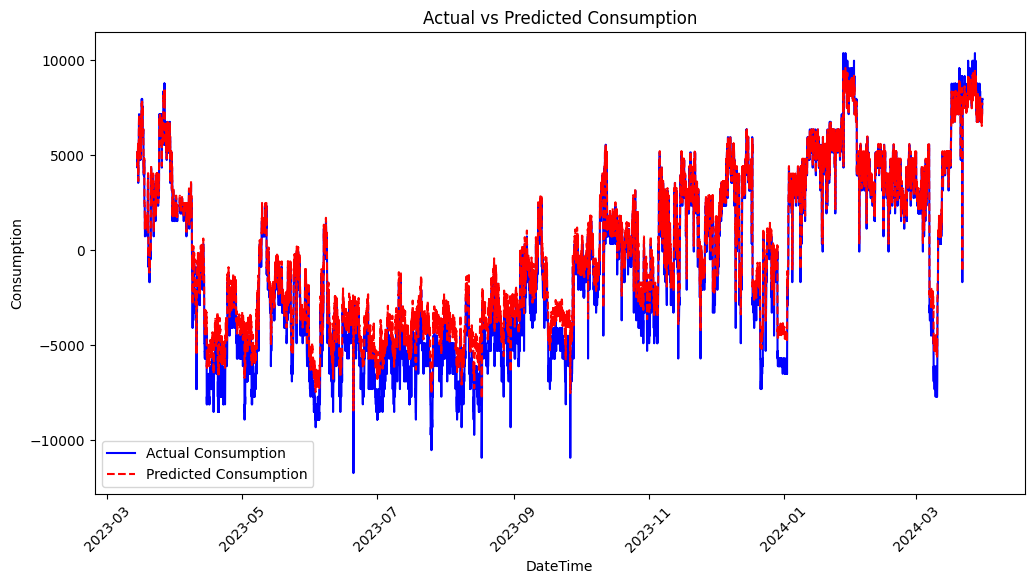

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Load and Preprocess Data === #

# Load electricity data
electricity_data = pd.read_csv('/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv')
electricity_data['DateTime'] = pd.to_datetime(electricity_data['DateTime'])
electricity_clean = electricity_data[
    ['DateTime', 'Consumption', 'Nuclear', 'Wind', 'Hydroelectric',
     'Oil and Gas', 'Coal', 'Solar', 'Biomass']
]

# Load weather data
weather_data = pd.read_csv('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', encoding='latin1')
weather_data['Date time'] = pd.to_datetime(weather_data['Date time'])
weather_clean = weather_data[
    ['Date time', 'Temperature', 'Dew Point', 'Relative Humidity',
     'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure']
]

# === Align the weather data with electricity data's timeline === #

# Filter the weather data based on the date range of electricity data (e.g., June 10-25)
start_date = electricity_clean['DateTime'].min()
end_date = electricity_clean['DateTime'].max()

weather_filtered = weather_clean[(weather_clean['Date time'] >= start_date) & (weather_clean['Date time'] <= end_date)]

# === Scale Data === #

# Scale electricity data (excluding 'DateTime' column)
electricity_scaler = StandardScaler()
electricity_scaled = electricity_clean.drop(columns=['DateTime', 'Consumption']).values
electricity_clean_scaled = electricity_scaler.fit_transform(electricity_scaled)

# Scale 'Consumption' using MinMaxScaler
consumption_scaler = MinMaxScaler(feature_range=(0, 1))
consumption_scaled = consumption_scaler.fit_transform(electricity_clean[['Consumption']])

# Scale weather data (excluding 'Date time' column)
weather_scaler = StandardScaler()
weather_scaled = weather_filtered.drop(columns=['Date time']).values
weather_clean_scaled = weather_scaler.fit_transform(weather_scaled)

# === Train/Test Split === #

train_size = int(len(electricity_clean_scaled) * 0.8)
train_electricity = electricity_clean_scaled[:train_size]
test_electricity = electricity_clean_scaled[train_size:]

train_weather = weather_clean_scaled[:train_size]
test_weather = weather_clean_scaled[train_size:]

train_target = consumption_scaled[:train_size]
test_target = consumption_scaled[train_size:]

# === Creating Datasets === #

class ElectricityDataset(Dataset):
    def __init__(self, data, target_column='Consumption', sequence_length=24):
        self.data = data  # NumPy array of the dataset
        self.target_column_index = data.columns.get_loc(target_column) if isinstance(data, pd.DataFrame) else -1
        self.target_column = data[:, self.target_column_index]  # Adjusted for NumPy array indexing
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length, :]
        target = self.target_column[idx + self.sequence_length - 1]  # Adjust the target index for correct value
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Sequence length for electricity data (e.g., 24 hours)
sequence_length = 24

# Create datasets for training and testing
train_electricity_dataset = ElectricityDataset(train_electricity, target_column='Consumption', sequence_length=24)
test_electricity_dataset = ElectricityDataset(test_electricity, target_column='Consumption', sequence_length=24)
train_weather_dataset = WeatherDataset(train_weather)
test_weather_dataset = WeatherDataset(test_weather)

# DataLoaders
batch_size = 32
train_electricity_loader = DataLoader(train_electricity_dataset, batch_size=batch_size, shuffle=True)
test_electricity_loader = DataLoader(test_electricity_dataset, batch_size=batch_size, shuffle=False)

train_weather_loader = DataLoader(train_weather_dataset, batch_size=1, shuffle=False)
test_weather_loader = DataLoader(test_weather_dataset, batch_size=1, shuffle=False)

# === Defining the Model === #

class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()

        # Separate LSTMs for electricity and weather data
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)

        # Fully connected layer for combining features
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        # Process electricity data
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]

        # Process weather data
        weather_data = weather_data.unsqueeze(1)  # Add batch dimension
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]

        # Combine features and make prediction
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model parameters
electricity_input_size = train_electricity.shape[1]
weather_input_size = train_weather.shape[1]
hidden_size = 64
output_size = 1

# Initialize model
model = CombinedLSTMModel(electricity_input_size, weather_input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Training Loop === #

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    # Iterate over electricity batches
    for i, (elec_inputs, elec_targets) in enumerate(train_electricity_loader):
        optimizer.zero_grad()

        # Get the corresponding weather sample (same index as electricity batch)
        weather_idx = i % len(train_weather_loader)
        weather_inputs = next(iter(train_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        outputs = model(elec_inputs, weather_inputs_repeated)
        loss = criterion(outputs.squeeze(), elec_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_electricity_loader)}")

# === Prediction === #

model.eval()  # Set model to evaluation mode
predictions = []
actual_values = []
timestamps = []  # To store the corresponding timestamps

with torch.no_grad():
    for elec_inputs, elec_targets in test_electricity_loader:
        # Get the corresponding weather sample (first entry of the weather loader)
        weather_inputs = next(iter(test_weather_loader))[0]  # Single weather data sample

        # Repeat weather inputs to match the electricity batch size
        weather_inputs_repeated = weather_inputs.repeat(elec_inputs.size(0), 1)

        # Forward pass
        batch_predictions = model(elec_inputs, weather_inputs_repeated)
        predictions.extend(batch_predictions.squeeze().cpu().numpy())
        actual_values.extend(elec_targets.cpu().numpy())

        # Store timestamps for the test data
        timestamps.extend(electricity_clean['DateTime'][train_size + len(timestamps):train_size + len(timestamps) + len(elec_targets)].values)


# === Display Results === #
# Convert predictions and actual values into a DataFrame
pred_df = pd.DataFrame({
    'DateTime': timestamps,
    'Actual Consumption': consumption_scaler.inverse_transform(np.array(actual_values).reshape(-1, 1)).flatten(),
    'Predicted Consumption': consumption_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
})
pred_df['MAE'] = np.abs(pred_df['Actual Consumption'] - pred_df['Predicted Consumption'])

# Display actual vs predicted values
print(pred_df.head())

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(pred_df['DateTime'], pred_df['Actual Consumption'], label='Actual Consumption', color='blue')
plt.plot(pred_df['DateTime'], pred_df['Predicted Consumption'], label='Predicted Consumption', color='red', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.legend()
plt.title('Actual vs Predicted Consumption')
plt.xticks(rotation=45)
plt.show()



In [ ]:
pred_df.head(10)

,DateTime,Actual Consumption,Predicted Consumption,MAE
0,2023-03-14 12:00:00,5155.296875,5228.254883,72.958008
1,2023-03-14 13:00:00,5155.296875,5228.954102,73.657227
2,2023-03-14 14:00:00,5155.296875,5228.716309,73.419434
3,2023-03-14 15:00:00,5155.296875,5230.309082,75.012207
4,2023-03-14 16:00:00,4350.823242,4429.953125,79.129883
5,2023-03-14 17:00:00,4753.060059,4828.834473,75.774414
6,2023-03-14 18:00:00,4753.060059,4827.749512,74.689453
7,2023-03-14 19:00:00,5155.296875,5226.039551,70.742676
8,2023-03-14 20:00:00,5155.296875,5228.829102,73.532227
9,2023-03-14 21:00:00,4753.060059,4829.354004,76.293945


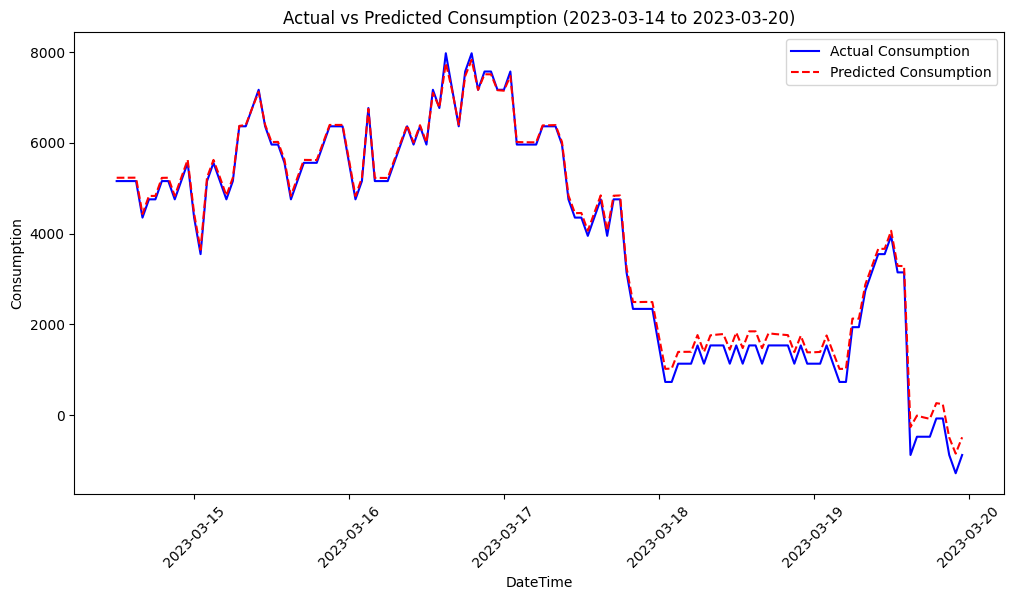

In [ ]:
# Specify the start and end dates
start_date_str = '2023-03-14'  # Start date
end_date_str = '2023-03-20'  # End date (exclusive)

# Convert the strings to datetime objects
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Filter the DataFrame for the selected date range
subset_df = pred_df[(pred_df['DateTime'] >= start_date) & (pred_df['DateTime'] < end_date)]

# Plot the subset
plt.figure(figsize=(12, 6))
plt.plot(subset_df['DateTime'], subset_df['Actual Consumption'], label='Actual Consumption', color='blue')
plt.plot(subset_df['DateTime'], subset_df['Predicted Consumption'], label='Predicted Consumption', color='red', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Actual vs Predicted Consumption ({start_date_str} to {end_date_str})')
plt.xticks(rotation=45)
plt.show()


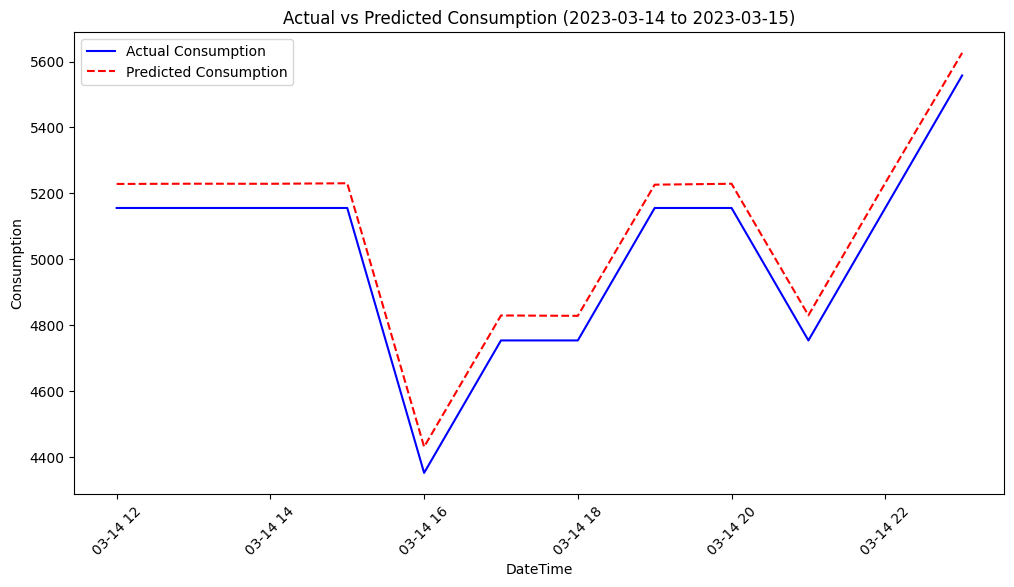

In [ ]:
# Specify the start and end dates
start_date_str = '2023-03-14'  # Start date
end_date_str = '2023-03-15'  # End date (exclusive)

# Convert the strings to datetime objects
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Filter the DataFrame for the selected date range
subset_df = pred_df[(pred_df['DateTime'] >= start_date) & (pred_df['DateTime'] < end_date)]

# Plot the subset
plt.figure(figsize=(12, 6))
plt.plot(subset_df['DateTime'], subset_df['Actual Consumption'], label='Actual Consumption', color='blue')
plt.plot(subset_df['DateTime'], subset_df['Predicted Consumption'], label='Predicted Consumption', color='red', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Actual vs Predicted Consumption ({start_date_str} to {end_date_str})')
plt.xticks(rotation=45)
plt.show()


### *************************************************

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error

def read_csv_encrypted(file_path):
    try:
        return pd.read_csv(file_path)
    except UnicodeDecodeError:
        return pd.read_csv(file_path, encoding='latin1')

# === Helper Function: Find Common Time Frame === #
def get_common_time_frame(file_paths, time_columns):
    min_start_time = None
    max_end_time = None

    for i in range(len(file_paths)):
        data = read_csv_encrypted(file_paths[i])
        data[time_columns[i]] = pd.to_datetime(data[time_columns[i]])
        start_time = data[time_columns[i]].min()
        end_time = data[time_columns[i]].max()

        # Update the common time frame
        if min_start_time is None or start_time > min_start_time:
            min_start_time = start_time
        if max_end_time is None or end_time < max_end_time:
            max_end_time = end_time

    return min_start_time, max_end_time

# === Helper Function: Load and Filter Data === #
def load_and_filter_data(file_path, time_column, value_columns, start_time, end_time):
    data = read_csv_encrypted(file_path)
    data[time_column] = pd.to_datetime(data[time_column])
    filtered_data = data[(data[time_column] >= start_time) & (data[time_column] <= end_time)]
    return filtered_data[value_columns]

# === Tensor Creation Functions === #
def create_target_tensors(data, target_column, sequence_length):
    scaler = MinMaxScaler()
    target_scaled = scaler.fit_transform(data[[target_column]])

    sequences = []
    targets = []
    for i in range(len(target_scaled) - sequence_length):
        seq_x = target_scaled[i:i + sequence_length]
        target_y = target_scaled[i + sequence_length]
        sequences.append(seq_x)
        targets.append(target_y)

    return torch.tensor(sequences, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32), scaler

def create_support_tensors(data, sequence_length):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    sequences = []
    for i in range(len(data_scaled) - sequence_length):
        seq_x = data_scaled[i:i + sequence_length]
        sequences.append(seq_x)

    return torch.tensor(sequences, dtype=torch.float32), scaler

# === Dataset Class === #
class CombinedDataset(Dataset):
    def __init__(self, target_sequences, target_targets, support_sequences):
        self.target_sequences = target_sequences
        self.target_targets = target_targets
        self.support_sequences = support_sequences

    def __len__(self):
        return len(self.target_targets)

    def __getitem__(self, idx):
        return (self.target_sequences[idx], self.support_sequences[idx], self.target_targets[idx])

# === LSTM Model === #
class CombinedLSTMModel(nn.Module):
    def __init__(self, target_input_size, support_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()
        self.target_lstm = nn.LSTM(target_input_size, hidden_size, batch_first=True)
        self.support_lstm = nn.LSTM(support_input_size, hidden_size, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, target_data, support_data):
        _, (target_hn, _) = self.target_lstm(target_data)
        _, (support_hn, _) = self.support_lstm(support_data)
        combined_features = torch.cat([target_hn[-1], support_hn[-1]], dim=1)
        output = self.fc(combined_features)
        return output

def main():
    # File paths and configurations
    target_file = '/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv'
    support_files = [
        ('/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv', 'Date time',
         ['Temperature', 'Dew Point', 'Relative Humidity', 'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure'])
    ]
    time_columns = ['DateTime', 'Date time']
    target_column = 'Consumption'
    sequence_length = 24

    # Get common time frame
    file_paths = [target_file] + [file[0] for file in support_files]
    start_time, end_time = get_common_time_frame(file_paths, time_columns)

    # Load and filter target data
    target_data = pd.read_csv(target_file)
    target_data[time_columns[0]] = pd.to_datetime(target_data[time_columns[0]])
    target_filtered = target_data[(target_data[time_columns[0]] >= start_time) & (target_data[time_columns[0]] <= end_time)]

    # Check and clean target data
    target_filtered = check_for_nan(target_filtered, "target data")

    # Create target tensors
    target_sequences, target_targets, target_scaler = create_target_tensors(target_filtered, target_column, sequence_length)

    # Load and filter support data
    support_sequences_list = []
    for file_path, time_column, value_columns in support_files:
        support_filtered = load_and_filter_data(file_path, time_column, value_columns, start_time, end_time)
        support_filtered = check_for_nan(support_filtered, "support data")
        support_sequences, _ = create_support_tensors(support_filtered, sequence_length)
        support_sequences_list.append(support_sequences)

    # Concatenate support tensors
    support_data_combined = torch.cat(support_sequences_list, dim=2)

    # Train-test split
    train_size = int(len(target_sequences) * 0.8)
    train_target = target_sequences[:train_size]
    train_support = support_data_combined[:train_size]
    train_labels = target_targets[:train_size]

    test_target = target_sequences[train_size:]
    test_support = support_data_combined[train_size:]
    test_labels = target_targets[train_size:]

    # DataLoader
    train_dataset = CombinedDataset(train_target, train_labels, train_support)
    test_dataset = CombinedDataset(test_target, test_labels, test_support)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize model
    model = CombinedLSTMModel(target_input_size=1, support_input_size=support_data_combined.shape[2], hidden_size=64, output_size=1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Lower learning rate

    # Training
    epochs = 10
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for target_seq, support_seq, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(target_seq, support_seq)

            # Check for NaN values in the output
            if torch.isnan(outputs).any():
                print("NaN values detected in model output, skipping this batch.")
                continue

            # Calculate loss and check for NaN
            loss = criterion(outputs.squeeze(), labels.squeeze())
            if torch.isnan(loss):
                print("NaN loss detected, skipping this batch.")
                continue

            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader)}")

    # Evaluation
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for target_seq, support_seq, labels in test_loader:
            outputs = model(target_seq, support_seq)

            # Check for NaN in the output
            if torch.isnan(outputs).any():
                print("NaN values detected in model output during evaluation, skipping this batch.")
                continue

            predictions.extend(outputs.squeeze().numpy())
            actuals.extend(labels.numpy())

    # Reverse scaling for actual and predicted values
    predictions = target_scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    actuals = target_scaler.inverse_transform(np.array(actuals).reshape(-1, 1))

    # Calculate Mean Absolute Error
    print("Mean Absolute Error:", mean_absolute_error(actuals, predictions))

if __name__ == "__main__":
    main()



NameError: name 'check_for_nan' is not defined

Epoch 1/10, Loss: 0.007630338496326105
Epoch 2/10, Loss: 0.004545133161338289
Epoch 3/10, Loss: 0.003812539349411331
Epoch 4/10, Loss: 0.0033508752381591045
Epoch 5/10, Loss: 0.0029785278774595455
Epoch 6/10, Loss: 0.0026398450124037005
Epoch 7/10, Loss: 0.0023220878754459
Epoch 8/10, Loss: 0.002094305257525538
Epoch 9/10, Loss: 0.0019161769922863205
Epoch 10/10, Loss: 0.0017396146737788196
             DateTime  Actual Consumption  Predicted Consumption         MAE
0 2019-01-02 08:00:00         6460.000000            6289.734863  170.265137
1 2019-01-02 09:00:00         6790.000000            6686.317383  103.682617
2 2019-01-02 10:00:00         6193.999512            6479.304199  285.304688
3 2019-01-02 11:00:00         6608.000000            6574.312012   33.687988
4 2019-01-02 12:00:00         7625.000000            7469.920410  155.079590


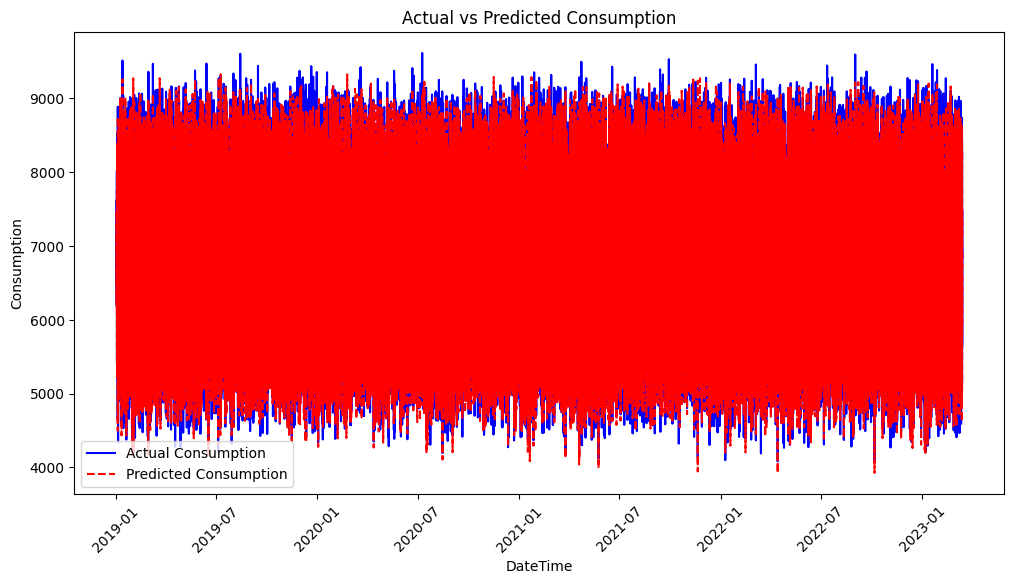

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Generalized Configuration === #
config = {
    "electricity_file": "/kaggle/input/hourly-electricity-consumption-and-production/electricityConsumptionAndProductioction.csv",
    "weather_file": "/kaggle/input/romania-weather-visual-crossing-weather/weather_2011-2021_Romania.csv",
    "electricity_columns": ['DateTime', 'Consumption', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
    "weather_columns": ['Date time', 'Temperature', 'Dew Point', 'Relative Humidity', 'Wind Speed', 'Cloud Cover', 'Visibility', 'Sea Level Pressure'],
    "electricity_date_col": 'DateTime',
    "weather_date_col": 'Date time',
    "target_column": 'Consumption',
    "sequence_length": 24,
    "batch_size": 32,
    "hidden_size": 64,
    "output_size": 1,
    "epochs": 10,
    "learning_rate": 0.001
}

# === Load and Preprocess Data === #
def load_and_preprocess(file_path, date_column, columns):
    try:
        data = pd.read_csv(file_path)
    except UnicodeDecodeError:
        data=pd.read_csv(file_path,encoding='latin1')
    data[date_column] = pd.to_datetime(data[date_column])
    return data[columns]

electricity_data = load_and_preprocess(config['electricity_file'], config['electricity_date_col'], config['electricity_columns'])
weather_data = load_and_preprocess(config['weather_file'], config['weather_date_col'], config['weather_columns'])

# Align data based on date ranges
start_date = electricity_data[config['electricity_date_col']].min()
end_date = electricity_data[config['electricity_date_col']].max()
weather_data_filtered = weather_data[
    (weather_data[config['weather_date_col']] >= start_date) &
    (weather_data[config['weather_date_col']] <= end_date)
]

# Scale data
def scale_data(data, date_col, exclude_cols):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data.drop(columns=exclude_cols))
    return scaled, scaler

electricity_scaled, electricity_scaler = scale_data(electricity_data, config['electricity_date_col'], [config['electricity_date_col'], config['target_column']])
weather_scaled, weather_scaler = scale_data(weather_data_filtered, config['weather_date_col'], [config['weather_date_col']])

target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = target_scaler.fit_transform(electricity_data[[config['target_column']]])

# Train/test split
train_size = int(len(electricity_scaled) * 0.8)
train_electricity, test_electricity = electricity_scaled[:train_size], electricity_scaled[train_size:]
train_weather, test_weather = weather_scaled[:train_size], weather_scaled[train_size:]
train_target, test_target = target_scaled[:train_size], target_scaled[train_size:]

# === Dataset Classes === #
class TimeSeriesDataset(Dataset):
    def __init__(self, data, target, sequence_length):
        self.data = data
        self.target = target
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        seq_x = self.data[idx:idx + self.sequence_length]
        target = self.target[idx + self.sequence_length - 1]
        return torch.tensor(seq_x, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

electricity_dataset = TimeSeriesDataset(train_electricity, train_target, config['sequence_length'])
weather_dataset = TimeSeriesDataset(train_weather, np.zeros(len(train_weather)), config['sequence_length'])  # Weather as additional input

# DataLoader
train_loader = DataLoader(electricity_dataset, batch_size=config['batch_size'], shuffle=True)

# === Model === #
class CombinedLSTMModel(nn.Module):
    def __init__(self, electricity_input_size, weather_input_size, hidden_size, output_size):
        super(CombinedLSTMModel, self).__init__()
        self.electricity_lstm = nn.LSTM(electricity_input_size, hidden_size, batch_first=True)
        self.weather_lstm = nn.LSTM(weather_input_size, hidden_size, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, electricity_data, weather_data):
        _, (elec_hn, _) = self.electricity_lstm(electricity_data)
        elec_features = elec_hn[-1]
        _, (weather_hn, _) = self.weather_lstm(weather_data)
        weather_features = weather_hn[-1]
        combined_features = torch.cat([elec_features, weather_features], dim=1)
        output = self.fc(combined_features)
        return output

# Model Initialization
model = CombinedLSTMModel(
    electricity_input_size=train_electricity.shape[1],
    weather_input_size=train_weather.shape[1],
    hidden_size=config['hidden_size'],
    output_size=config['output_size']
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])

# === Training Loop === #
for epoch in range(config['epochs']):
    model.train()
    total_loss = 0
    for elec_inputs, targets in train_loader:
        optimizer.zero_grad()
        weather_inputs = torch.zeros_like(elec_inputs)  # Placeholder for weather inputs
        outputs = model(elec_inputs, weather_inputs)

        # Ensure the target and output shapes match
        targets = targets.squeeze()  # Squeeze the target to remove the extra dimension
        loss = criterion(outputs.squeeze(), targets)  # Squeeze the model's output
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{config['epochs']}, Loss: {total_loss / len(train_loader)}")

# === Prediction and Evaluation === #
model.eval()
predictions = []
actual_values = []
timestamps = []

with torch.no_grad():
    for elec_inputs, targets in train_loader:
        weather_inputs = torch.zeros_like(elec_inputs)  # Placeholder for weather inputs
        outputs = model(elec_inputs, weather_inputs).squeeze()

        predictions.extend(outputs.cpu().numpy())
        actual_values.extend(targets.cpu().numpy())
        timestamps.extend(
            electricity_data[config['electricity_date_col']][len(predictions):len(predictions) + len(targets)].values
        )

# Inverse transform predictions and actual values
predictions = target_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actual_values = target_scaler.inverse_transform(np.array(actual_values).reshape(-1, 1)).flatten()

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'DateTime': timestamps,
    'Actual Consumption': actual_values,
    'Predicted Consumption': predictions
})
results_df['MAE'] = np.abs(results_df['Actual Consumption'] - results_df['Predicted Consumption'])

# === Display Results === #
print(results_df.head())

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(results_df['DateTime'], results_df['Actual Consumption'], label='Actual Consumption', color='blue')
plt.plot(results_df['DateTime'], results_df['Predicted Consumption'], label='Predicted Consumption', color='red', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.legend()
plt.title('Actual vs Predicted Consumption')
plt.xticks(rotation=45)
plt.show()

In [ ]:
results_df.head()

,DateTime,Actual Consumption,Predicted Consumption,MAE
0,2019-01-02 08:00:00,6460.000000,6289.734863,170.265137
1,2019-01-02 09:00:00,6790.000000,6686.317383,103.682617
2,2019-01-02 10:00:00,6193.999512,6479.304199,285.304688
3,2019-01-02 11:00:00,6608.000000,6574.312012,33.687988
4,2019-01-02 12:00:00,7625.000000,7469.920410,155.079590


In [ ]:
results_df['DateTime']=pd.to_datetime(results_df['DateTime'])
print('min',results_df['DateTime'].min())
print('max',results_df['DateTime'].max())

min 2019-01-02 08:00:00
max 2023-03-14 03:00:00


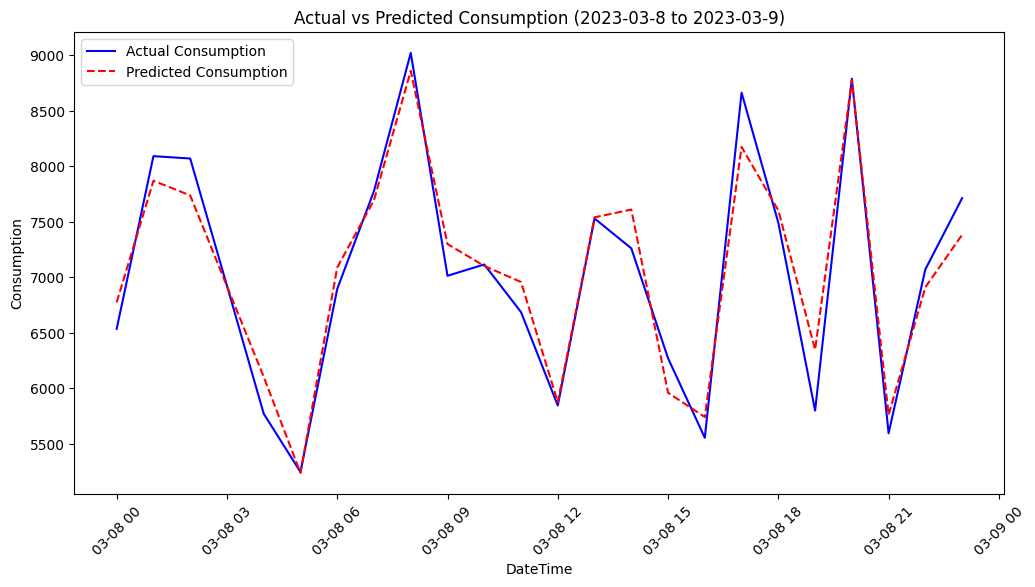

In [ ]:
# Specify the start and end dates
start_date_str = '2023-03-8'  # Start date
end_date_str = '2023-03-9'  # End date (exclusive)

# Convert the strings to datetime objects
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Filter the DataFrame for the selected date range
subset_df = results_df[(results_df['DateTime'] >= start_date) & (results_df['DateTime'] < end_date)]

# Plot the subset
plt.figure(figsize=(12, 6))
plt.plot(subset_df['DateTime'], subset_df['Actual Consumption'], label='Actual Consumption', color='blue')
plt.plot(subset_df['DateTime'], subset_df['Predicted Consumption'], label='Predicted Consumption', color='red', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Actual vs Predicted Consumption ({start_date_str} to {end_date_str})')
plt.xticks(rotation=45)
plt.show()
